# BT4012 Team 19 Group Project

## Team members
+ LAW HIU YAN (A0225757W)
+ LIM JING YU (A0233257H)
+ NG XIANG HAN (A0220690M)
+ SEAH JIA JUN (A0218067A)
+ TAN JIA HUI (A0223956X)

## 1. Importing the required libraries

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore")

## 2. Loading Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/My Drive/BT4012 Fraud Analytics/Code/transaction_dataset.csv')
#dataset = pd.read_csv('transaction_dataset.csv')
dataset.head()

Mounted at /content/drive


,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [4]:
print("The shape of the dataset is: " + str(dataset.shape))

The shape of the dataset is: (9841, 51)


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [6]:
duplicate_rows = dataset[dataset.duplicated()]
num_duplicated_rows = duplicate_rows.shape[0]
print(f"The number of duplicate rows in this dataset is: {num_duplicated_rows}")

The number of duplicate rows in this dataset is: 0


In [7]:
#gives total count of fraudulent transactions
fraudulent_count = dataset['FLAG'].value_counts()[1]

#gives ttoal count of non-fraudulent transactions
non_fraudulent_count = dataset['FLAG'].value_counts()[0]

#required ratio
ratio = fraudulent_count/non_fraudulent_count

#answer
print("The ratio of fraud vs non-fraud transactions is " + str(ratio) +'.')

The ratio of fraud vs non-fraud transactions is 0.2843904985643435.


## 3. Data Cleaning

In [8]:
#Drop index-related columns that are not useful
dataset.drop(columns=['Unnamed: 0', "Index", 'Address'], axis=1, inplace=True)

In [9]:
# Look at dataset again
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

After inspecting the dataset using dataset.info(), we have identified potential duplicate columns due to their similar names:

First set of potential duplicates: ' ERC20 avg time between rec tnx' and ' ERC20 avg time between rec 2 tnx.'

Second set of potential duplicates: ' ERC20 uniq sent addr' and ' ERC20 uniq sent addr.1'


In [10]:
# check if first set of columns are duplicates
first_set_columns = dataset[' ERC20 avg time between rec tnx'].equals(dataset[' ERC20 avg time between rec 2 tnx'])

if first_set_columns:
    print(f"The columns ' ERC20 avg time between rec tnx' and ' ERC20 avg time between rec 2 tnx' are exactly the same.")
else:
    print(f"The columns ' ERC20 avg time between rec tnx' and ' ERC20 avg time between rec 2 tnx' are not the same.")

# check if second set of columns are duplicates
second_set_columns = dataset[' ERC20 uniq sent addr'].equals(dataset[' ERC20 uniq sent addr.1'])

if second_set_columns:
    print(f"The columns ' ERC20 uniq sent addr' and ' ERC20 uniq sent addr.1' are exactly the same.")
else:
    print(f"The columns ' ERC20 uniq sent addr' and ' ERC20 uniq sent addr.1' are not the same.")

The columns ' ERC20 avg time between rec tnx' and ' ERC20 avg time between rec 2 tnx' are exactly the same.
The columns ' ERC20 uniq sent addr' and ' ERC20 uniq sent addr.1' are not the same.


As we can see, the first set of columns are duplicates, so we will be dropping one of them.

However, the second set of columns are not duplicates. Based on the column names, there seems to be a pattern. Based on our intuition, columns 29 (ERC20 uniq sent addr.1) and 30 (ERC20 uniq rec contract addr) should follow the same pattern as columns 27 (ERC20 uniq sent addr) and 28 (ERC20 uniq rec addr)

Hence, we believe that column 29 could potentially be misnamed by the author and it should be called 'ERC20 uniq sent contract addr' instead of 'ERC20 uniq sent addr.1'

To confirm our suspicion, we will check column 29 (ERC20 uniq sent contract addr) with column 26 (ERC20 total Ether sent contract). The reason for this is because if ERC20 uniq sent contract addr is 0, it means that there is no ERC20 token transactions sent to unique contract addresses, so ERC20 total Ether sent contract should be 0 as well.

In [11]:
# If the column is indeed ''
filtered_df = dataset[dataset[' ERC20 uniq sent addr.1'] == 0]

# Check if all corresponding values in ' ERC20 total Ether sent contract' are 0
if (filtered_df[' ERC20 total Ether sent contract'] == 0).all():
    print("All values in ' ERC20 total Ether sent contract' are 0 when ' ERC20 uniq sent addr.1' is 0.")
else:
    print("Not all values in ' ERC20 total Ether sent contract' are 0 when ' ERC20 uniq sent addr.1' is 0.")


filtered_df2 = dataset[dataset[' ERC20 uniq sent addr.1'] != 0]

# Check if all corresponding values in ' ERC20 total Ether sent contract' are not 0
if (filtered_df2[' ERC20 total Ether sent contract'] != 0).all():
    print("All values in ' ERC20 total Ether sent contract' are not 0 when ' ERC20 uniq sent addr.1' is not 0.")
else:
    print("Not all values in ' ERC20 total Ether sent contract' are not 0 when ' ERC20 uniq sent addr.1' is not 0.")

All values in ' ERC20 total Ether sent contract' are 0 when ' ERC20 uniq sent addr.1' is 0.
All values in ' ERC20 total Ether sent contract' are not 0 when ' ERC20 uniq sent addr.1' is not 0.


Hence, we can assume that column 29 was misnamed by the author and it should be called 'ERC20 uniq sent contract addr' instead of 'ERC20 uniq sent addr.1' and we will be renaming the column as such.

In [12]:
# Rename col 29 to ERC20 uniq sent contract addr
dataset = dataset.rename(columns={' ERC20 uniq sent addr.1':'ERC20 uniq sent contract addr'})

In [13]:
#drop duplicate columns
dataset.drop(columns=[' ERC20 avg time between rec 2 tnx'], axis=1, inplace=True)

In [14]:
#Rename target variable as Y
dataset = dataset.rename(columns={'FLAG':'Y'})

In [15]:
# Count number of missing values for each column, sort them in descending order
top_missing_columns = dataset.isnull().sum().sort_values(ascending=False)
top_missing_columns

 ERC20_most_rec_token_type                              851
 ERC20 most sent token type                             841
 ERC20 max val rec                                      829
 ERC20 total Ether sent contract                        829
 ERC20 uniq sent addr                                   829
 ERC20 uniq rec addr                                    829
ERC20 uniq sent contract addr                           829
 ERC20 uniq rec contract addr                           829
 ERC20 avg time between sent tnx                        829
 ERC20 avg time between rec tnx                         829
 ERC20 avg time between contract tnx                    829
 ERC20 min val rec                                      829
 ERC20 avg val rec                                      829
 ERC20 total Ether received                             829
 ERC20 min val sent                                     829
 ERC20 max val sent                                     829
 ERC20 avg val sent                     

In [16]:
#inspect values of ERC20 most sent token type to decide how to impute values
dataset[' ERC20 most sent token type'].value_counts()
# dataset[' ERC20 min val sent'].value_counts()

0                                                         4399
None                                                      1856
                                                          1191
EOS                                                        138
OmiseGO                                                    137
                                                          ... 
Arcona Distribution Contract                                 1
HeroCoin                                                     1
Cindicator                                                   1
UnlimitedIP Token                                            1
eosDAC Community Owned EOS Block Producer ERC20 Tokens       1
Name:  ERC20 most sent token type, Length: 305, dtype: int64

We see that the highest count of ERC20 most sent token type is a token called '0' at a count of 4399, followed by '' at a count of 1856.
From research, these tokens do not exist. It is also unlikely that '0' and '' are actual token names, due to their lack of distinctiveness.
We can categorize this column into observations with meaningful token names vs not meaningful names (such as '0', '' and missing values).

In [17]:
#mapping function to map 'ERC 20 most sent token type'
def map_token_type(token_name):
    if (token_name in ['0', "''"]):
        return 0
    else:
        return 1

#replace empty values with 0
dataset[' ERC20 most sent token type'].fillna(0, inplace=True)
#map remainder of the values
dataset[' ERC20 most sent token type'] = dataset[' ERC20 most sent token type'].apply(map_token_type)
#rename column
dataset = dataset.rename(columns={' ERC20 most sent token type': 'ERC20_most_sent_token_valid_name'})

In [18]:
#nature of column ' ERC20_most_rec_token_type' is similar to previous case, apply same transformation
#replace empty values with 0
dataset[' ERC20_most_rec_token_type'].fillna(0, inplace=True)
#map remainder of the values
dataset[' ERC20_most_rec_token_type'] = dataset[' ERC20_most_rec_token_type'].apply(map_token_type)
#rename column
dataset = dataset.rename(columns={' ERC20_most_rec_token_type': 'ERC20_most_rec_token_valid_name'})

In [19]:
dataset.isnull().sum().sort_values(ascending=False)

 Total ERC20 tnxs                                       829
 ERC20 max val rec                                      829
 ERC20 total Ether sent contract                        829
 ERC20 uniq sent addr                                   829
 ERC20 uniq rec addr                                    829
ERC20 uniq sent contract addr                           829
 ERC20 uniq rec contract addr                           829
 ERC20 avg time between sent tnx                        829
 ERC20 avg time between rec tnx                         829
 ERC20 avg time between contract tnx                    829
 ERC20 min val rec                                      829
 ERC20 avg val rec                                      829
 ERC20 total Ether received                             829
 ERC20 min val sent                                     829
 ERC20 max val sent                                     829
 ERC20 avg val sent                                     829
 ERC20 min val sent contract            

For the remainder of the columns with missing values, we see that the count of rows with missing values are consistently 829. This is a sign that they are not missing completely at random (MCAR).

In [20]:
dataset_with_na_rows = dataset[dataset.isnull().any(axis = 1)]
dataset_with_na_rows[[' ERC20 max val rec', ' ERC20 uniq sent addr', ' ERC20 uniq rec addr', 'ERC20 uniq sent contract addr', ' ERC20 uniq rec contract addr',
' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx', ' ERC20 avg time between contract tnx', ' ERC20 min val rec',
' ERC20 avg val rec', ' ERC20 total ether sent', ' ERC20 min val sent', ' ERC20 max val sent' , ' ERC20 avg val sent',
' ERC20 min val sent contract', ' ERC20 max val sent contract',' ERC20 avg val sent contract', ' ERC20 uniq sent token name', ' ERC20 uniq rec token name',
' ERC20 total Ether sent contract', ' ERC20 total Ether received',' Total ERC20 tnxs']]

,ERC20 max val rec,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent contract addr,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 avg val rec,...,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 total Ether sent contract,ERC20 total Ether received,Total ERC20 tnxs
7662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
print("Number of rows with missing values for fraud transactions: ",dataset_with_na_rows[dataset_with_na_rows["Y"] == 1].shape[0])

Number of rows with missing values for fraud transactions:  829


In [22]:
min(dataset[dataset["Y"] == 1][' Total ERC20 tnxs'].dropna()) #fraud transactions with no ERC tokens are not identified, as min transaction = 1 instead of 0

1.0

For the remainder of the columns with missing values, we see that all missing values for all columns are in the same observations, and that they are only for fraud cases. We identified that these observations do not involve ERC20 tokens and the columns with missing values should be imputed with the value 0.

In [23]:
to_be_imputed = [' ERC20 max val rec', ' ERC20 uniq sent addr', ' ERC20 uniq rec addr', 'ERC20 uniq sent contract addr', ' ERC20 uniq rec contract addr',
' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx', ' ERC20 avg time between contract tnx', ' ERC20 min val rec',
' ERC20 avg val rec', ' ERC20 total ether sent', ' ERC20 min val sent', ' ERC20 max val sent' , ' ERC20 avg val sent',
' ERC20 min val sent contract', ' ERC20 max val sent contract',' ERC20 avg val sent contract', ' ERC20 uniq sent token name', ' ERC20 uniq rec token name',
' ERC20 total Ether sent contract', ' ERC20 total Ether received',' Total ERC20 tnxs']
for col in to_be_imputed:
  dataset[col].fillna(0, inplace=True)

In [24]:
#inspect resultant df to check that there are not more missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 47 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Y                                                     9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

There are no more missing values. Our resulting dataframe has 45 columns and 9841 observations.

In [25]:
#check for less or zero variance
numeric_columns = dataset.select_dtypes(include=['int64', 'float64'])

# Calculate the variance for each numeric column
for column in numeric_columns.columns:
    column_variance = numeric_columns[column].var()
    print(f"Variance in '{column}': {column_variance}")

Variance in 'Y': 0.17241103050701273
Variance in 'Avg min between sent tnx': 461671829.791403
Variance in 'Avg min between received tnx': 532765558.15345657
Variance in 'Time Diff between first and last (Mins)': 104288903881.01013
Variance in 'Sent tnx': 573391.7611902419
Variance in 'Received Tnx': 885173.4141139443
Variance in 'Number of Created Contracts': 20006.852947970285
Variance in 'Unique Received From Addresses': 89174.56869358987
Variance in 'Unique Sent To Addresses': 69601.20869607243
Variance in 'min value received': 106229.80395792934
Variance in 'max value received ': 169229437.82202128
Variance in 'avg val received': 8323237.903808778
Variance in 'min val sent': 19212.643822774065
Variance in 'max val sent': 43946460.26083183
Variance in 'avg val sent': 57159.349305730815
Variance in 'min value sent to contract': 5.0803714012142645e-08
Variance in 'max val sent to contract': 2.6606518910266735e-07
Variance in 'avg value sent to contract': 1.0460961450311993e-07
Varianc

From above, we see that the following variables have zero variance
* ' ERC20 avg time between sent tnx'
* ' ERC20 avg time between rec tnx'
* ' ERC20 avg time between contract tnx'
* ' ERC20 min val sent contract'
* ' ERC20 max val sent contract'
* ' ERC20 avg val sent contract'

And the following variables have extremely low variance, close to zero:
* 'min value sent to contract'
* 'max val sent to contract'
* 'avg value sent to contract'
* 'total ether sent contracts'
* 'ERC20 uniq sent contract addr'

We can see that these variables are related to smart contracts.

In [26]:
#Drop columns with zero or extremely low variance
dataset.drop(columns=[' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx', ' ERC20 avg time between contract tnx',
' ERC20 min val sent contract', ' ERC20 max val sent contract', ' ERC20 avg val sent contract', 'min value sent to contract', 'max val sent to contract',
'avg value sent to contract', 'total ether sent contracts', 'ERC20 uniq sent contract addr'], axis=1, inplace=True)

We did consider dropping outliers on the numerical columns, based on 1.5IQR. However, many of these numerical columns contain 0 or values that are extraordinarily high. For example, for the ERC20 avg val sent column, there are a huge majority of rows whose values are 0 as seen below, but there are also values that are very huge. If we were to apply the IQR method, we will be dropping almost all rows, essentially removing that entire column.

The '0's in this case do hold a significance, showing that no ERC20 was sent from the account. Huge outliers (i.e. huge values) might also be an indicator of suspicious behaviour, so we decided not to remove outliers in this case.

In [27]:
dataset[' ERC20 avg val sent'].value_counts()

0.000000        8373
100.000000       121
0.000001          11
10000.000000       5
1.000000           4
                ... 
0.938440           1
0.452260           1
586.270104         1
112.555556         1
18.571500          1
Name:  ERC20 avg val sent, Length: 1309, dtype: int64

## 4. EDA

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 36 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Y                                                     9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [29]:
from scipy import stats
numerical_variables = dataset.select_dtypes(include=['int64', 'float64'])
numerical_variables = numerical_variables.columns
descriptive_stats = dataset[numerical_variables].describe().loc[['mean', 'std', 'min','50%','max']].transpose()
descriptive_stats.columns = ['mean', 'std','min', 'median','max']
descriptive_stats['variance'] = descriptive_stats['std']**2
descriptive_stats['mode'] = dataset[numerical_variables].mode().transpose()[0]
descriptive_stats['mad'] = [stats.median_abs_deviation(dataset[x]) for x in numerical_variables]
descriptive_stats['kurtosis'] = [stats.kurtosis(dataset[x]) for x in numerical_variables]
descriptive_stats['skewness'] = [stats.skew(dataset[x]) for x in numerical_variables]

descriptive_stats

,mean,std,min,median,max,variance,mode,mad,kurtosis,skewness
Y,2.214206e-01,4.152241e-01,0.00,0.000000,1.000000e+00,1.724110e-01,0.0,0.000000,-0.199318,1.341895
Avg min between sent tnx,5.086879e+03,2.148655e+04,0.00,17.340000,4.302877e+05,4.616718e+08,0.0,17.340000,95.032225,8.418716
Avg min between received tnx,8.004851e+03,2.308171e+04,0.00,509.770000,4.821755e+05,5.327656e+08,0.0,509.770000,67.971030,6.744270
Time Diff between first and last (Mins),2.183333e+05,3.229379e+05,0.00,46637.030000,1.954861e+06,1.042889e+11,0.0,46637.030000,2.953471,1.809701
Sent tnx,1.159317e+02,7.572264e+02,0.00,3.000000,1.000000e+04,5.733918e+05,0.0,3.000000,120.634073,10.482946
Received Tnx,1.637009e+02,9.408366e+02,0.00,4.000000,1.000000e+04,8.851734e+05,1.0,3.000000,82.576773,8.820039
Number of Created Contracts,3.729702e+00,1.414456e+02,0.00,0.000000,9.995000e+03,2.000685e+04,0.0,0.000000,3112.610930,51.712336
Unique Received From Addresses,3.036094e+01,2.986211e+02,0.00,2.000000,9.999000e+03,8.917457e+04,1.0,1.000000,418.567105,18.113345
Unique Sent To Addresses,2.584016e+01,2.638204e+02,0.00,2.000000,9.287000e+03,6.960121e+04,1.0,1.000000,410.105291,18.351527
min value received,4.384515e+01,3.259291e+02,0.00,0.095856,1.000000e+04,1.062298e+05,0.0,0.095856,657.800891,23.292332


From the descriptive statistics, we find many columns with mode 0 and MAD 0, while still having high std dev. We should also drop the columns where close to all observations are 0 and a very small number of outliers exist (<1%), as an unlucky train-val-test split may mean that the model will not capture the feature effectively. However, we will not drop the feature if the majority of non 0 are in the fraud class, as it means that it is an indicator of fraud.

In [30]:
print("Col name", "Number of non-0s")
cols_with_0_mad = descriptive_stats[descriptive_stats['mad'] == 0].index
for x in cols_with_0_mad:
  print(x,dataset[dataset[x] != 0].shape[0])

Col name Number of non-0s
Y 2179
Number of Created Contracts 1356
 Total ERC20 tnxs 4613
 ERC20 total Ether received 4572
 ERC20 total ether sent 1566
 ERC20 total Ether sent contract 28
 ERC20 uniq sent addr 1566
 ERC20 uniq rec addr 4573
 ERC20 uniq rec contract addr 4573
 ERC20 min val rec 2275
 ERC20 max val rec 4425
 ERC20 avg val rec 4420
 ERC20 min val sent 767
 ERC20 max val sent 1477
 ERC20 avg val sent 1468
 ERC20 uniq sent token name 1566
 ERC20 uniq rec token name 4573
ERC20_most_sent_token_valid_name 5441
ERC20_most_rec_token_valid_name 5442


In [31]:
dataset[dataset[' ERC20 total Ether sent contract'] > 0][["Y"]].value_counts()

Y
0    24
1     4
dtype: int64

<Axes: >

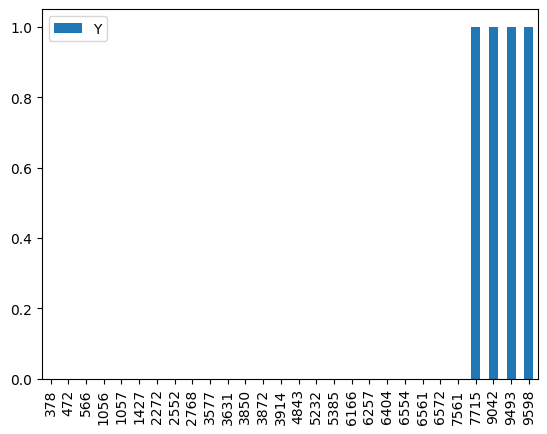

In [32]:
dataset[dataset[' ERC20 total Ether sent contract'] > 0][["Y"]].plot.bar()

We identify that the column 'ERC20 total Ether sent contract' should be dropped as only 28 out of 9841 (or 0.295%) entries are non 0. For the remaining columns, the number of non 0 are sizable, and thus should not be dropped.

In [33]:
dataset.drop(' ERC20 total Ether sent contract', axis = 1, inplace = True)

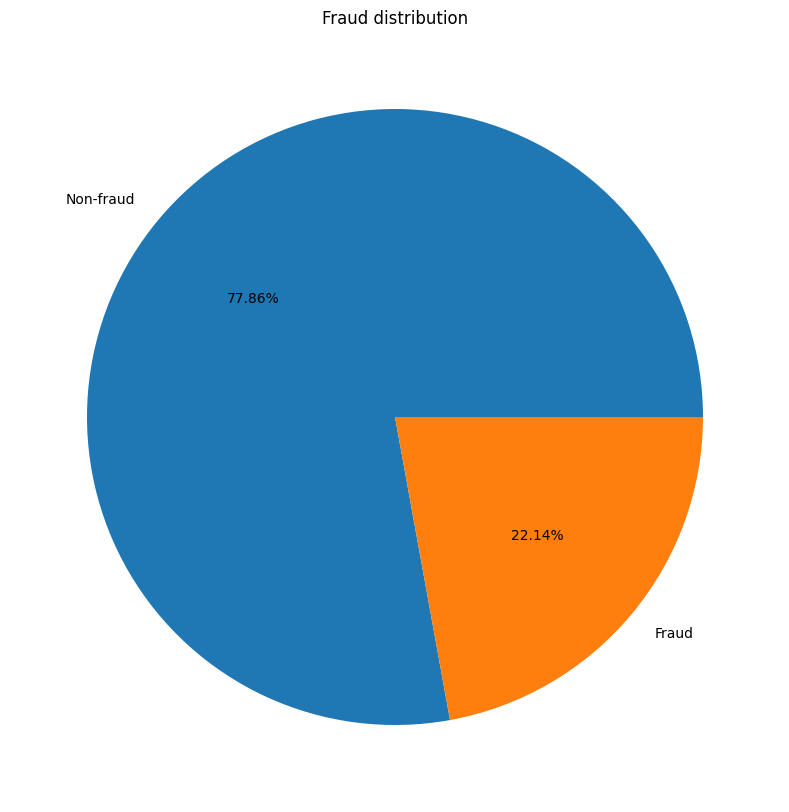

In [34]:
pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
plt.pie(x = dataset['Y'].value_counts(), autopct='%.2f%%', labels=labels)
plt.title('Fraud distribution')
plt.show()

In [35]:
# Select only the specified columns above
num_vs = dataset.select_dtypes(include=['int64', 'float64'])
#drop last two binary columns
num_vs.drop(columns=['ERC20_most_sent_token_valid_name', 'ERC20_most_rec_token_valid_name'], axis=1, inplace=True)
correlation = num_vs.corr()

# Apply a color gradient, map green background and set 2 decimal places
correlation_styled = correlation.style.background_gradient(cmap='Greens').format("{:.2f}")
correlation_styled

,Y,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
Y,1.00,-0.03,-0.12,-0.27,-0.08,-0.08,-0.01,-0.03,-0.05,-0.02,-0.02,-0.01,0.01,-0.02,-0.06,-0.10,-0.01,-0.02,-0.00,-0.03,-0.01,0.02,-0.03,-0.03,-0.06,0.00,-0.01,0.00,0.02,0.02,0.02,-0.03,-0.06
Avg min between sent tnx,-0.03,1.00,0.06,0.21,-0.03,-0.04,-0.01,-0.02,-0.02,-0.01,-0.01,-0.00,-0.00,-0.01,0.00,-0.04,-0.01,-0.01,-0.00,-0.01,-0.00,-0.00,-0.01,0.00,0.05,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.05
Avg min between received tnx,-0.12,0.06,1.00,0.30,-0.04,-0.05,-0.01,-0.03,-0.03,-0.05,-0.01,-0.01,-0.01,-0.01,-0.04,-0.06,-0.01,-0.01,-0.00,-0.02,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.00,-0.00,-0.00,-0.02,-0.01
Time Diff between first and last (Mins),-0.27,0.21,0.30,1.00,0.15,0.15,-0.00,0.04,0.07,-0.08,-0.00,-0.01,-0.01,0.01,-0.05,0.19,0.01,0.01,0.00,0.08,0.05,-0.00,0.04,0.08,0.33,-0.01,0.05,0.05,-0.01,-0.01,-0.01,0.27,0.33
Sent tnx,-0.08,-0.03,-0.04,0.15,1.00,0.20,0.32,0.13,0.67,0.02,0.10,0.14,-0.00,0.23,0.03,0.73,0.24,0.16,-0.13,0.38,0.01,-0.00,0.36,0.30,0.22,-0.00,0.00,0.01,-0.00,-0.00,-0.00,0.08,0.22
Received Tnx,-0.08,-0.04,-0.05,0.15,0.20,1.00,-0.00,0.65,0.16,-0.02,0.22,-0.00,0.09,0.10,0.13,0.81,0.13,0.24,0.16,0.12,0.02,-0.00,0.04,0.14,0.20,-0.00,0.02,0.02,-0.00,-0.00,-0.00,0.05,0.21
Number of Created Contracts,-0.01,-0.01,-0.01,-0.00,0.32,-0.00,1.00,-0.00,0.08,-0.00,-0.00,-0.00,-0.00,0.14,-0.00,0.28,0.02,-0.00,-0.04,0.25,0.00,0.00,0.15,0.19,0.03,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.01,0.03
Unique Received From Addresses,-0.03,-0.02,-0.03,0.04,0.13,0.65,-0.00,1.00,0.16,-0.01,0.18,-0.00,0.30,0.06,0.23,0.52,0.03,0.12,0.14,0.06,0.00,0.00,0.05,0.08,0.15,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.04,0.15
Unique Sent To Addresses,-0.05,-0.02,-0.03,0.07,0.67,0.16,0.08,0.16,1.00,0.07,0.15,0.21,-0.00,0.20,0.02,0.50,0.16,0.09,-0.11,0.15,0.01,0.00,0.12,0.18,0.24,-0.00,0.00,0.01,-0.00,-0.00,-0.00,0.09,0.24
min value received,-0.02,-0.01,-0.05,-0.08,0.02,-0.02,-0.00,-0.01,0.07,1.00,0.03,0.12,0.12,0.02,0.27,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.03,0.00


In [36]:
num_vs = dataset.select_dtypes(include=['int64', 'float64'])

numerical_dataset = dataset[list(num_vs)]

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(numerical_dataset, 25))

Top Absolute Correlations
 ERC20 total Ether received        ERC20 max val rec                                      0.999967
 ERC20 max val sent                ERC20 avg val sent                                     0.999952
ERC20_most_sent_token_valid_name  ERC20_most_rec_token_valid_name                         0.999794
 ERC20 min val sent                ERC20 avg val sent                                     0.999785
                                   ERC20 max val sent                                     0.999729
 ERC20 total ether sent            ERC20 max val sent                                     0.999649
 ERC20 uniq rec contract addr      ERC20 uniq rec token name                              0.999643
 ERC20 total ether sent            ERC20 avg val sent                                     0.999566
                                   ERC20 min val sent                                     0.999311
 ERC20 total Ether received        ERC20 avg val rec                               

In [37]:
perfect_corr_cols = [' ERC20 max val sent', ' ERC20 min val sent', ' ERC20 avg val sent', ' ERC20 max val rec', ' ERC20 uniq rec contract addr']
#re-check corr. matrix
#drop cols w perfect corr
num_vs.drop(columns=perfect_corr_cols, axis=1, inplace=True)
correlation_new = num_vs.corr()

# Apply a color gradient, map green background and set 2 decimal places
correlation_styled = correlation_new.style.background_gradient(cmap='Greens').format("{:.2f}")
correlation_styled

,Y,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 min val rec,ERC20 avg val rec,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20_most_sent_token_valid_name,ERC20_most_rec_token_valid_name
Y,1.00,-0.03,-0.12,-0.27,-0.08,-0.08,-0.01,-0.03,-0.05,-0.02,-0.02,-0.01,0.01,-0.02,-0.06,-0.10,-0.01,-0.02,-0.00,-0.03,-0.01,0.02,-0.03,-0.03,0.00,0.00,-0.03,-0.06,0.48,0.48
Avg min between sent tnx,-0.03,1.00,0.06,0.21,-0.03,-0.04,-0.01,-0.02,-0.02,-0.01,-0.01,-0.00,-0.00,-0.01,0.00,-0.04,-0.01,-0.01,-0.00,-0.01,-0.00,-0.00,-0.01,0.00,0.00,-0.00,0.00,0.05,0.13,0.13
Avg min between received tnx,-0.12,0.06,1.00,0.30,-0.04,-0.05,-0.01,-0.03,-0.03,-0.05,-0.01,-0.01,-0.01,-0.01,-0.04,-0.06,-0.01,-0.01,-0.00,-0.02,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.02,-0.01,-0.02,-0.02
Time Diff between first and last (Mins),-0.27,0.21,0.30,1.00,0.15,0.15,-0.00,0.04,0.07,-0.08,-0.00,-0.01,-0.01,0.01,-0.05,0.19,0.01,0.01,0.00,0.08,0.05,-0.00,0.04,0.08,-0.01,0.05,0.27,0.33,0.32,0.32
Sent tnx,-0.08,-0.03,-0.04,0.15,1.00,0.20,0.32,0.13,0.67,0.02,0.10,0.14,-0.00,0.23,0.03,0.73,0.24,0.16,-0.13,0.38,0.01,-0.00,0.36,0.30,-0.00,0.01,0.08,0.22,0.08,0.08
Received Tnx,-0.08,-0.04,-0.05,0.15,0.20,1.00,-0.00,0.65,0.16,-0.02,0.22,-0.00,0.09,0.10,0.13,0.81,0.13,0.24,0.16,0.12,0.02,-0.00,0.04,0.14,-0.00,0.02,0.05,0.21,0.11,0.11
Number of Created Contracts,-0.01,-0.01,-0.01,-0.00,0.32,-0.00,1.00,-0.00,0.08,-0.00,-0.00,-0.00,-0.00,0.14,-0.00,0.28,0.02,-0.00,-0.04,0.25,0.00,0.00,0.15,0.19,-0.00,0.00,0.01,0.03,0.02,0.02
Unique Received From Addresses,-0.03,-0.02,-0.03,0.04,0.13,0.65,-0.00,1.00,0.16,-0.01,0.18,-0.00,0.30,0.06,0.23,0.52,0.03,0.12,0.14,0.06,0.00,0.00,0.05,0.08,-0.00,0.00,0.04,0.15,0.06,0.06
Unique Sent To Addresses,-0.05,-0.02,-0.03,0.07,0.67,0.16,0.08,0.16,1.00,0.07,0.15,0.21,-0.00,0.20,0.02,0.50,0.16,0.09,-0.11,0.15,0.01,0.00,0.12,0.18,-0.00,0.01,0.09,0.24,0.06,0.06
min value received,-0.02,-0.01,-0.05,-0.08,0.02,-0.02,-0.00,-0.01,0.07,1.00,0.03,0.12,0.12,0.02,0.27,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.03,0.00,-0.10,-0.10


From above, we see some variables that are highly correlated, let's investigate those pair of variables and decide whether to drop or not:
* total transactions (including tnx to create contract, Sent Tnx: 0.73
  * total transations is sum of sent, received (normal and contract). **Drop total transactions.**
* total transactions (including tnx to create contract, Received Tnx: 0.81
  * same rationale as above. **Drop total transactions.**
* Unique Received From Addresses, Received Tnx: 0.65
  * in this dataset where addresses are close to unique (25 duplicates only, seen from above), almost every received transaction will be from a unique address. Unique Received From Addresses gives close to similar information to total Received Tnx. **Drop Unique Received From Addresses.**
* Unique Sent To Addresses, Sent Tnx: 0.67
  * same rationale as above, but for 'sent' case. **Drop Unique Sent To Addresses.**
* ERC20 uniq sent addr, Total ERC20 tnxs: 0.73
  * same rationale as above, but for 'ERC20' case. **Drop Total ERC20 tnxs.**
* ERC20 uniq rec addr, Total ERC20 tnxs: 0.72
  * same rationale as above, but for 'ERC20' case. **Drop Total ERC20 tnxs.**
* ERC20 avg val rec, ERC20 total Ether received: 0.86
  * simple mathematical derivations of one another, information may be redundant. **Drop ERC20 avg val rec.**
* avg val received, max val received: 0.62
  * simple mathematical derivations of one another, information may be redundant. **Drop avg val received.**
* total ether received, total Ether sent: 0.77
  * implies that an account sends and receives token relatively evenly, no reason to remove. **Keep for now.**
* ERC20 uniq rec token name, ERC20 uniq sent token name: 0.79
  * implies that an account sends and receives token relatively evenly, no reason to remove. **Keep for now.**

In summary, following columns are to be dropped:
* total transactions (including tnx to create contract
* Unique Received From Addresses
* Unique Sent To Addresses
* Total ERC20 tnxs
* ERC20 avg val rec
* avg val received


In [38]:
highly_corr_cols = [ 'total transactions (including tnx to create contract', 'Unique Received From Addresses', 'Unique Sent To Addresses', ' Total ERC20 tnxs', ' ERC20 avg val rec', 'avg val received']

#re-check corr. matrix
#drop cols w perfect corr
num_vs.drop(columns=highly_corr_cols, axis=1, inplace=True)
correlation_new1 = num_vs.corr()

# Apply a color gradient, map green background and set 2 decimal places
correlation_styled = correlation_new1.style.background_gradient(cmap='Greens').format("{:.2f}")
correlation_styled

,Y,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,min value received,max value received,min val sent,max val sent,avg val sent,total Ether sent,total ether received,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 min val rec,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20_most_sent_token_valid_name,ERC20_most_rec_token_valid_name
Y,1.00,-0.03,-0.12,-0.27,-0.08,-0.08,-0.01,-0.02,-0.02,0.01,-0.02,-0.06,-0.01,-0.02,-0.00,-0.01,0.02,-0.03,-0.03,0.00,-0.03,-0.06,0.48,0.48
Avg min between sent tnx,-0.03,1.00,0.06,0.21,-0.03,-0.04,-0.01,-0.01,-0.01,-0.00,-0.01,0.00,-0.01,-0.01,-0.00,-0.00,-0.00,-0.01,0.00,0.00,0.00,0.05,0.13,0.13
Avg min between received tnx,-0.12,0.06,1.00,0.30,-0.04,-0.05,-0.01,-0.05,-0.01,-0.01,-0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.02,-0.01,-0.02,-0.02
Time Diff between first and last (Mins),-0.27,0.21,0.30,1.00,0.15,0.15,-0.00,-0.08,-0.00,-0.01,0.01,-0.05,0.01,0.01,0.00,0.05,-0.00,0.04,0.08,-0.01,0.27,0.33,0.32,0.32
Sent tnx,-0.08,-0.03,-0.04,0.15,1.00,0.20,0.32,0.02,0.10,-0.00,0.23,0.03,0.24,0.16,-0.13,0.01,-0.00,0.36,0.30,-0.00,0.08,0.22,0.08,0.08
Received Tnx,-0.08,-0.04,-0.05,0.15,0.20,1.00,-0.00,-0.02,0.22,0.09,0.10,0.13,0.13,0.24,0.16,0.02,-0.00,0.04,0.14,-0.00,0.05,0.21,0.11,0.11
Number of Created Contracts,-0.01,-0.01,-0.01,-0.00,0.32,-0.00,1.00,-0.00,-0.00,-0.00,0.14,-0.00,0.02,-0.00,-0.04,0.00,0.00,0.15,0.19,-0.00,0.01,0.03,0.02,0.02
min value received,-0.02,-0.01,-0.05,-0.08,0.02,-0.02,-0.00,1.00,0.03,0.12,0.02,0.27,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,-0.03,0.00,-0.10,-0.10
max value received,-0.02,-0.01,-0.01,-0.00,0.10,0.22,-0.00,0.03,1.00,0.00,0.14,0.04,0.11,0.30,0.28,0.01,-0.00,0.00,0.04,-0.00,0.01,0.18,0.02,0.02
min val sent,0.01,-0.00,-0.01,-0.01,-0.00,0.09,-0.00,0.12,0.00,1.00,0.02,0.59,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.00,0.01,0.01


In [39]:
#corr. matrix looks ok now, apply column deletion on actual dataset
drop_columns_corr = perfect_corr_cols + highly_corr_cols
dataset.drop(columns=drop_columns_corr, axis=1, inplace=True)

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Y                                        9841 non-null   int64  
 1   Avg min between sent tnx                 9841 non-null   float64
 2   Avg min between received tnx             9841 non-null   float64
 3   Time Diff between first and last (Mins)  9841 non-null   float64
 4   Sent tnx                                 9841 non-null   int64  
 5   Received Tnx                             9841 non-null   int64  
 6   Number of Created Contracts              9841 non-null   int64  
 7   min value received                       9841 non-null   float64
 8   max value received                       9841 non-null   float64
 9   min val sent                             9841 non-null   float64
 10  max val sent                             9841 no

Next, we plot the distribution of each variable across the Y variable, and see if there are any distributions we can compare.

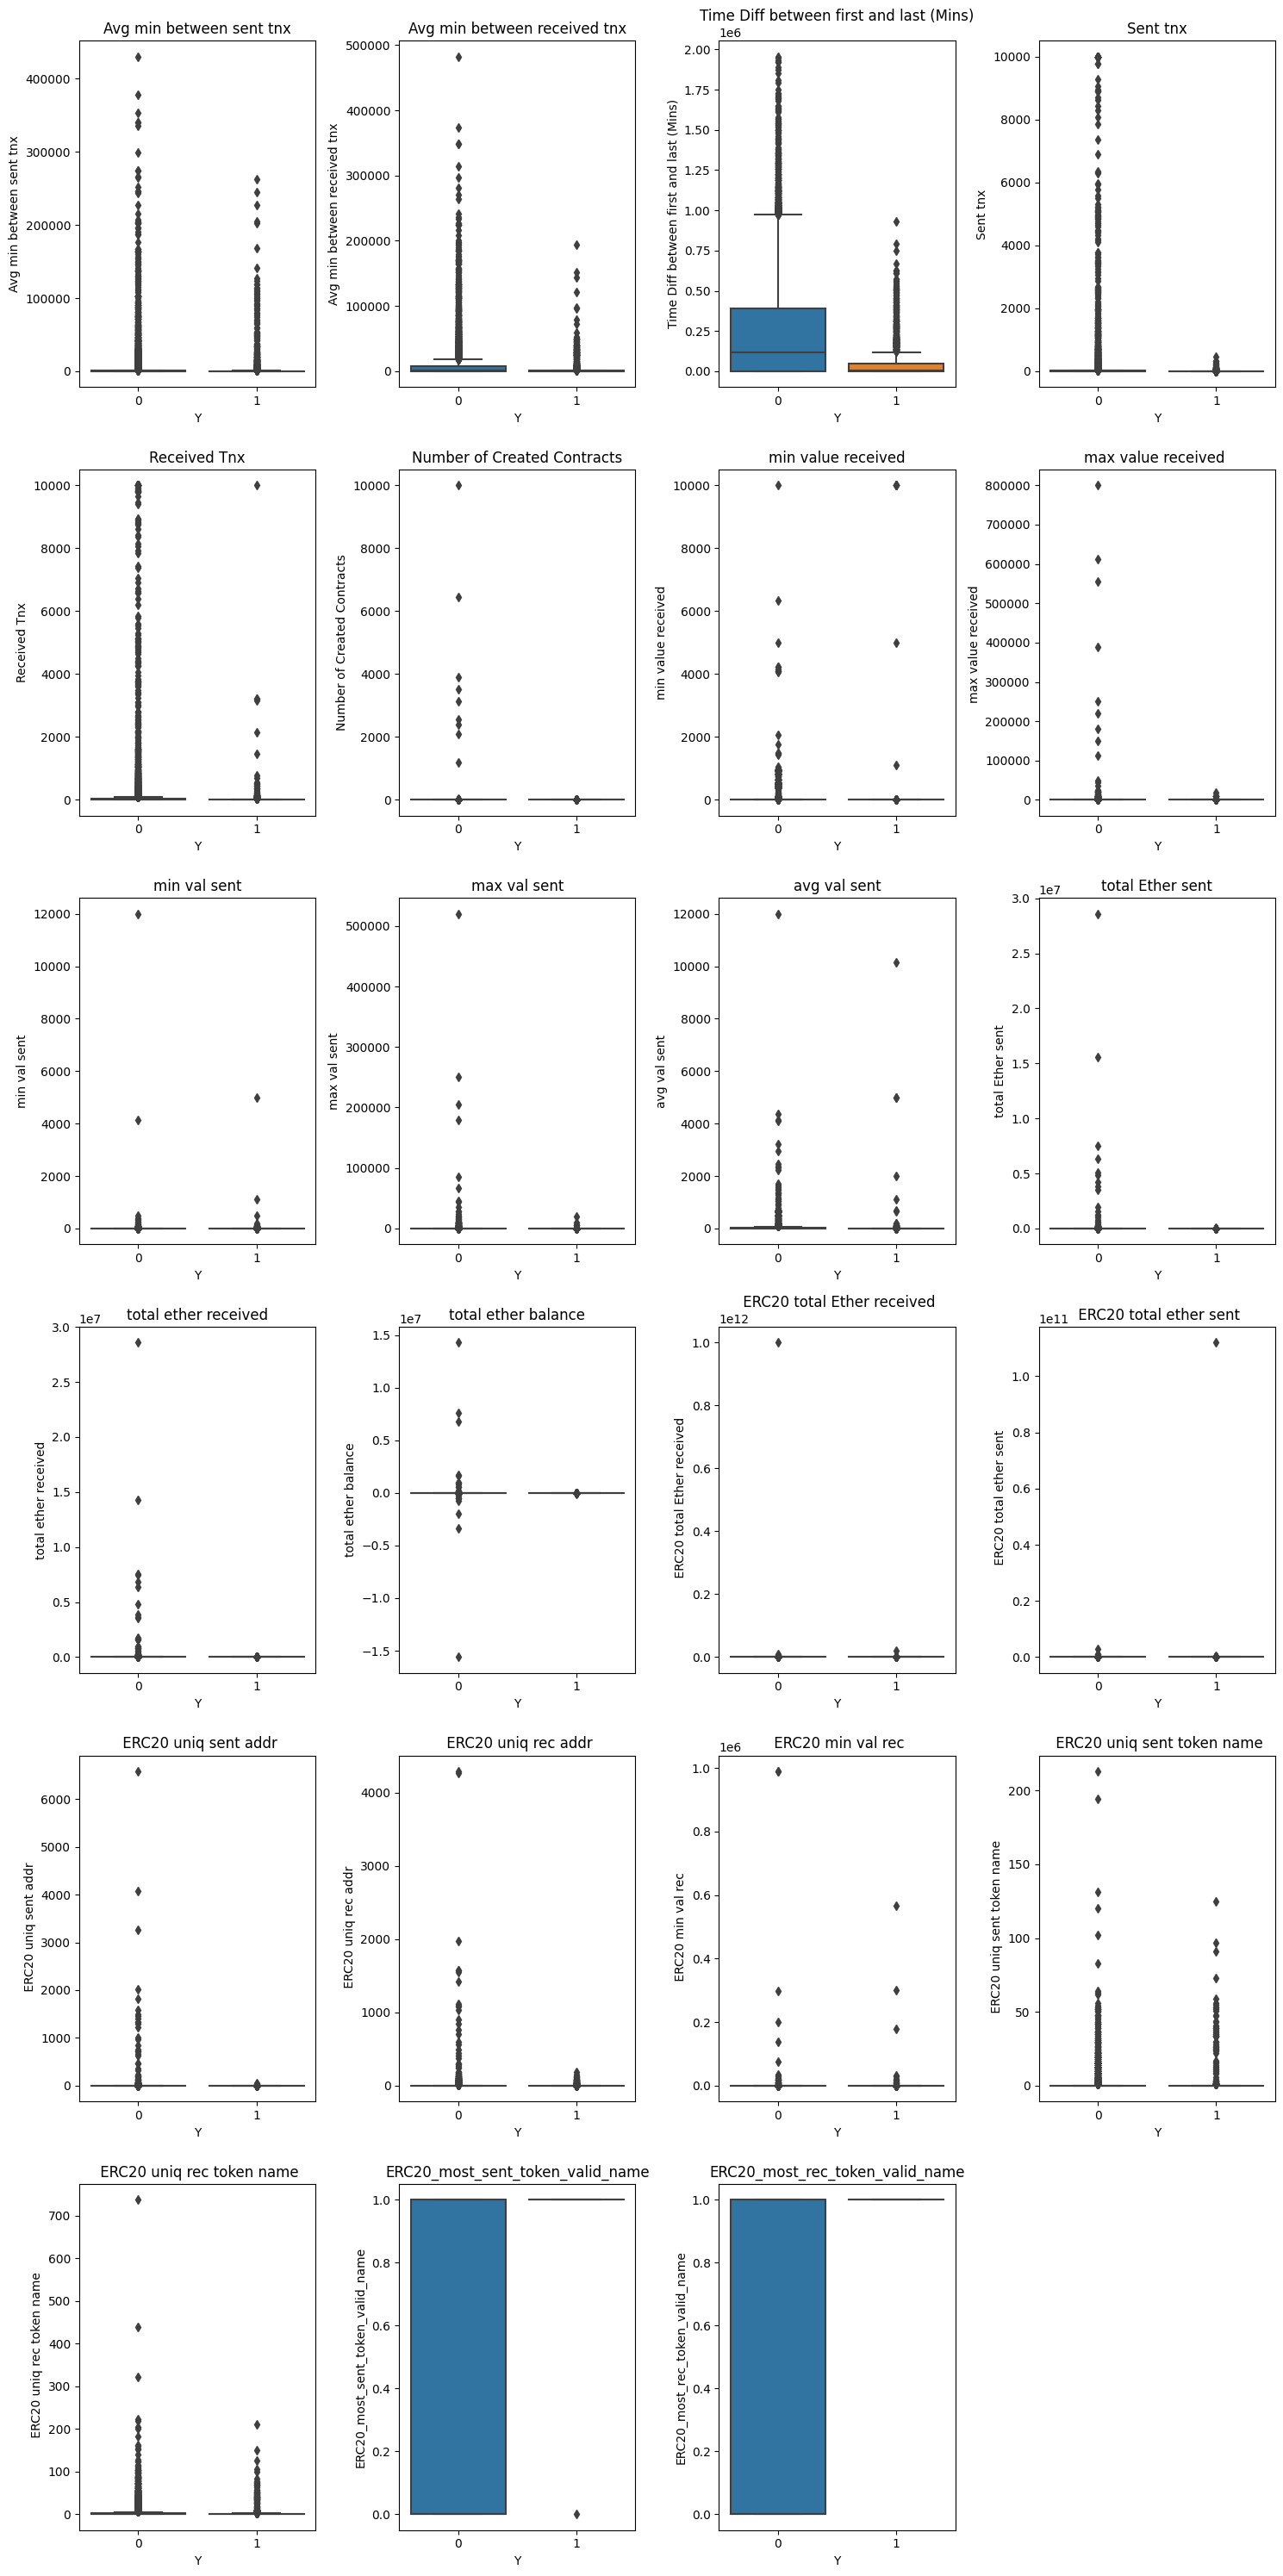

In [41]:
numeric_columns = dataset.dtypes[dataset.dtypes != 'object'].index
numeric_columns = list(numeric_columns)
numeric_columns.remove('Y')
# Determine the number of rows and columns for subplots
num_rows = (len(numeric_columns) + 3) // 4  # Adjust based on the desired layout
num_cols = 4  # You can change this based on your layout preference
# Creating box plots for each numeric column based on 'Response'
plt.figure(figsize=(15, 5*num_rows))
for idx, column in enumerate(numeric_columns, start=1):
    plt.subplot(num_rows, num_cols, idx)
    sns.boxplot(data=dataset, x='Y', y=column)
    plt.title(column)
plt.tight_layout()
plt.show()

We see that the time difference between the first and last transaction shows
significant variability across both fraudulent and non-fraudulent transactions. Let's compare that with variables that might correlate with it logically.


*   Received_Tnx: Fraudulent transactions might receive less transactions (if the user decides to transfer a big amount of ERC20 at once for example), or they might receive more transactions (if the user spreads out value among more transactions to reduce suspicion)
*   Sent Tnx: same argument as above.
*   avg val received: Fraudulent transactions might receive huge amounts / small amounts on average, similar to the argument above.
*   avg_val_sent: Fraudulent transactions might send huge amounts / small amounts on average, similar to the argument above.

*   ERC20 uniq sent addr: Fraudulent transactions might send all tokens to a single account.
*   ERC20 uniq rec addr: Fraudulent transactions might receive all tokens in a single account.

Relative Plot of Selected Features: A Data Subset


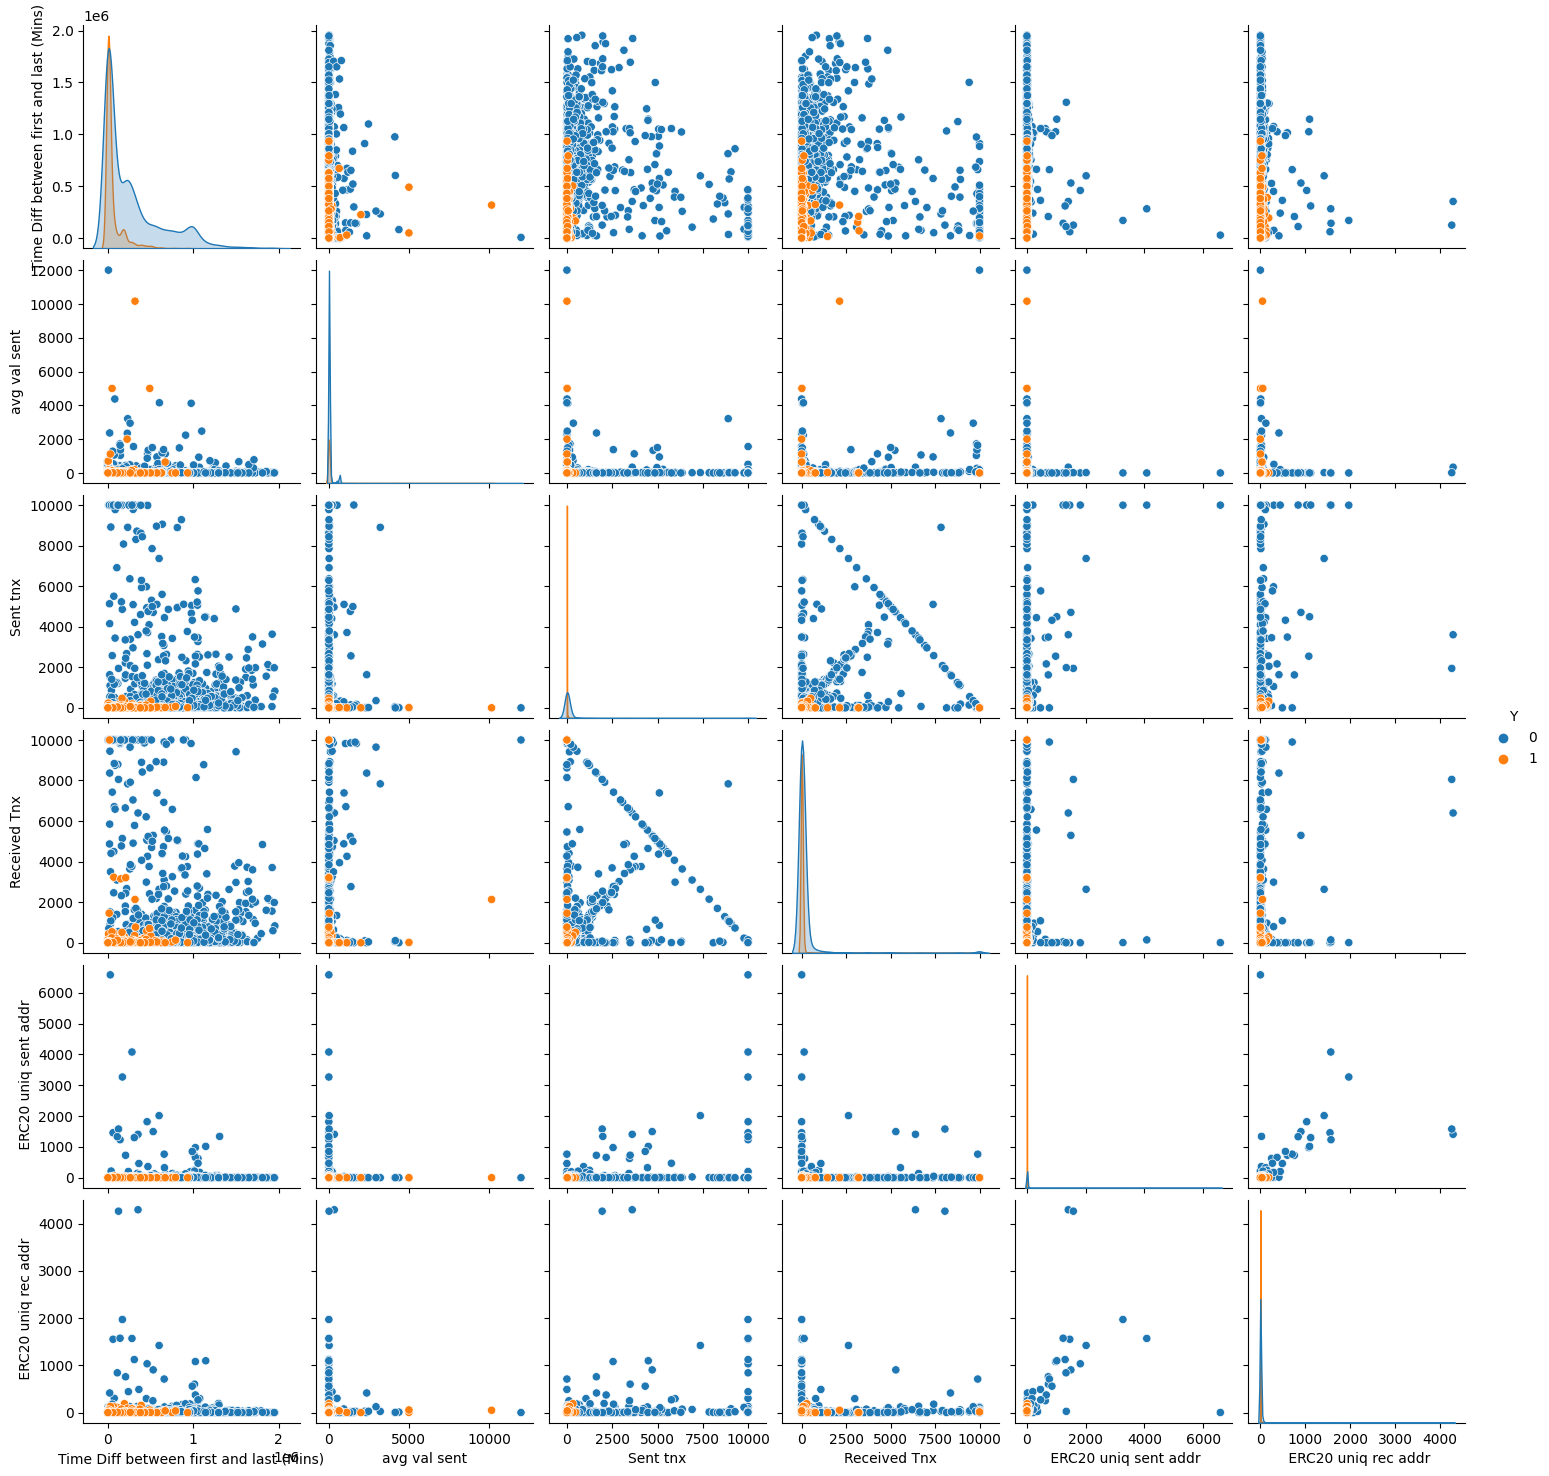

In [42]:
features_to_plot = ["Time Diff between first and last (Mins)", "avg val sent", "Sent tnx", "Received Tnx", " ERC20 uniq sent addr", " ERC20 uniq rec addr", "Y"]

# Print a title for the plot.
print("Relative Plot of Selected Features: A Data Subset")

# Create a pair plot.
sns.pairplot(dataset[features_to_plot], hue="Y")

# Display the plot.
plt.show()

We can observe that the spread of fradulent transactions for each column, over time difference between first and last transaction is heavily biased towards shorter time differences. Furthermore, These fraudulent transactions have very little unique sent and receiving addresses, low amounts of received and sent transactions, and low values of average value received and sent.

This could mean that frauders create throwaway accounts (perhaps automated) that send or receive tokens from specific addresses, and in low amounts to prevent suspicion of what they were doing. This would explain the low time diff between first and last transactions, as they probably created more throwaway accounts after they're done with one to reduce tracability.

In [43]:
#edits

## 5. Feature Engineering

**Feature Creation**


New Feature 1: Ratio of number of sent transactions to number of received transactions

This feature can highlight transactions with atypical sending and receiving patterns, which are often indicative of fraud. These atypical patterns can be suggestive of fraudulent activities, such as individuals or entities attempting to accumulate assets without making proportional outgoing transactions.

In [44]:
# Calculate the Sent-to-Received Ratio, replacing infinity with NaN
dataset['Sent_to_Received_Ratio'] = dataset['Sent tnx'] / dataset['Received Tnx']
dataset['Sent_to_Received_Ratio'].fillna(1, inplace=True)
dataset['Sent_to_Received_Ratio'].replace([np.inf, -np.inf], 1, inplace=True)

<Axes: xlabel='Y', ylabel='Sent_to_Received_Ratio'>

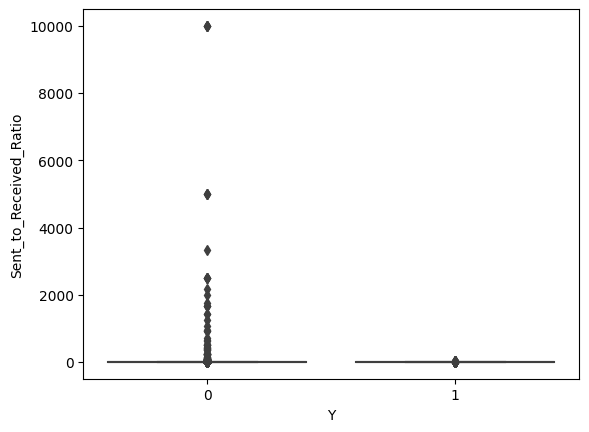

In [45]:
# Boxplot with outliers
sns.boxplot(data=dataset, x='Y', y='Sent_to_Received_Ratio')

From the boxplot, we can see that there is a wider spread of values for non-fraudulent transactions and they exhibit a more diverse range of behaviour when it comes to the ratio of sent to received transactions.

On the other hand, the ratio of sent to received transactions for fraudulent transactions are mostly concentrated around the lower end of the ratio scale, which indicates that fraudulent transactions often involve fewer received transactions compared to sent transactions.

<Axes: xlabel='Y', ylabel='Sent_to_Received_Ratio'>

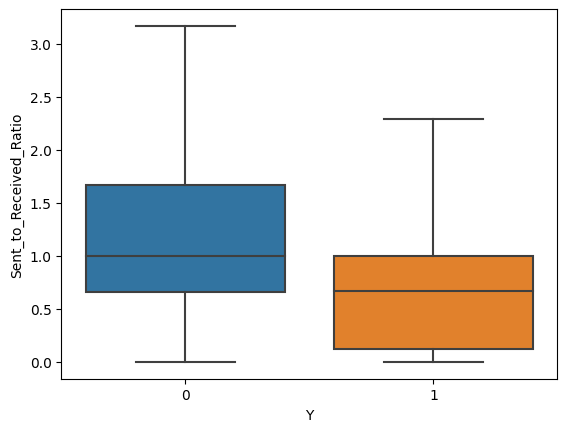

In [46]:
# Boxplot without outliers
sns.boxplot(data=dataset, x='Y', y='Sent_to_Received_Ratio', showfliers = False)

The boxplot analysis reveals that for non-fraudulent transactions, there is significant variability in the Sent_to_Received ratio. This suggests that non-fraudulent transactions exhibit a wide range of sending and receiving behaviors, with many transactions having relatively high ratios. In contrast, fraudulent transactions tend to have lower ratios on average, indicating that they often involve sending less relative to receiving.

Moreover, while there is variability in the Sent_to_Received ratio for fraudulent transactions, a substantial proportion of them have lower ratios, meaning they tend to send less compared to what they receive. This pattern aligns with the intuition that fraudulent activities often involve receiving assets without sending a significant amount in return, such as in Ponzi schemes or phishing attacks.


New Feature 2: Ratio of Total Ether Sent to Total Ether Received

Similiar to the previous feature, we created this feature to identify suspicious transactions based on the value of Ether sent to value of Ether reived.

In [47]:
# Calculate the Ether_Sent_to_Received_Ratio Ratio, same logic as sent-to-receive ratio above, impute those dividing by 0 by 1
dataset['Ether_Sent_to_Received_Ratio'] = dataset['total Ether sent'] / dataset['total ether received']
dataset['Ether_Sent_to_Received_Ratio'].fillna(1, inplace=True)
dataset['Ether_Sent_to_Received_Ratio'].replace([np.inf, -np.inf], 1, inplace=True)

<Axes: xlabel='Y', ylabel='Ether_Sent_to_Received_Ratio'>

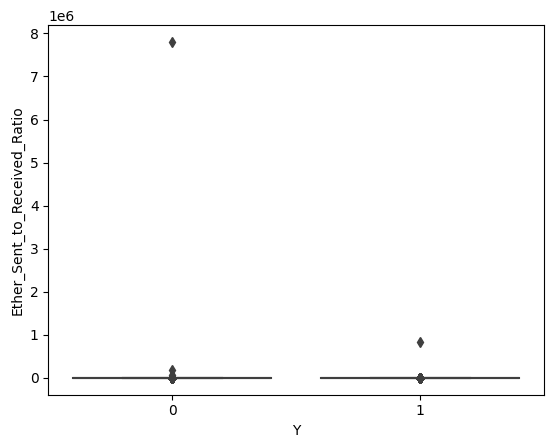

In [48]:
# Box plot with outliers
sns.boxplot(data=dataset, x='Y', y='Ether_Sent_to_Received_Ratio')

From this boxplot, the distribution of the ratio looks pretty similiar for both fraudulent and non-fraudulent activities if we exclude the one outlier for non-fraud.

<Axes: xlabel='Y', ylabel='Ether_Sent_to_Received_Ratio'>

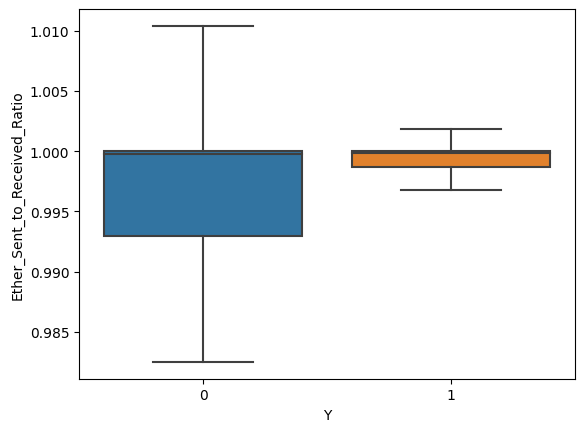

In [49]:
# Boxplot without outliers
sns.boxplot(data=dataset, x='Y', y='Ether_Sent_to_Received_Ratio', showfliers = False)

Both non-fraudulent and fraudulent transactions have ratios with values clustered around 1. This suggests that, on average, both types of transactions maintain a balance between the Ether sent and received.

However, for fraudulent transactions, the ratios are concentrated in an even narrower range, with the minimum and maximum values extremely close to 1. The IQR is also very small and extremely close to 1. This indicates a strong tendency for non-legitimate transactions to maintain near-perfect balance between Ether sent and received.

A possible reason for this could be that by maintaining a ratio close to 1, fraudsters reduce the likelihood of their transactions being flagged as suspicious or unusual by anti-fraud algorithms and financial institutions.

We have decided the drop the original columns for two main reasons:


1.   Data redundancy - the newly created columns already contain information about the 4 columns
2.   Reduced dimensionality - the number of features currently are already relateively high (close to 20) and dropping the columns will help in reducing the dimensionality of the feature variables



In [50]:
#drop the original columns
dataset.drop(columns = ['total Ether sent', 'total ether received', 'Sent tnx', 'Received Tnx'], inplace=True, axis=1)

In [51]:
#check that the columns are dropped correctly
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Y                                        9841 non-null   int64  
 1   Avg min between sent tnx                 9841 non-null   float64
 2   Avg min between received tnx             9841 non-null   float64
 3   Time Diff between first and last (Mins)  9841 non-null   float64
 4   Number of Created Contracts              9841 non-null   int64  
 5   min value received                       9841 non-null   float64
 6   max value received                       9841 non-null   float64
 7   min val sent                             9841 non-null   float64
 8   max val sent                             9841 non-null   float64
 9   avg val sent                             9841 non-null   float64
 10  total ether balance                      9841 no

## 6. Data Pre-processing

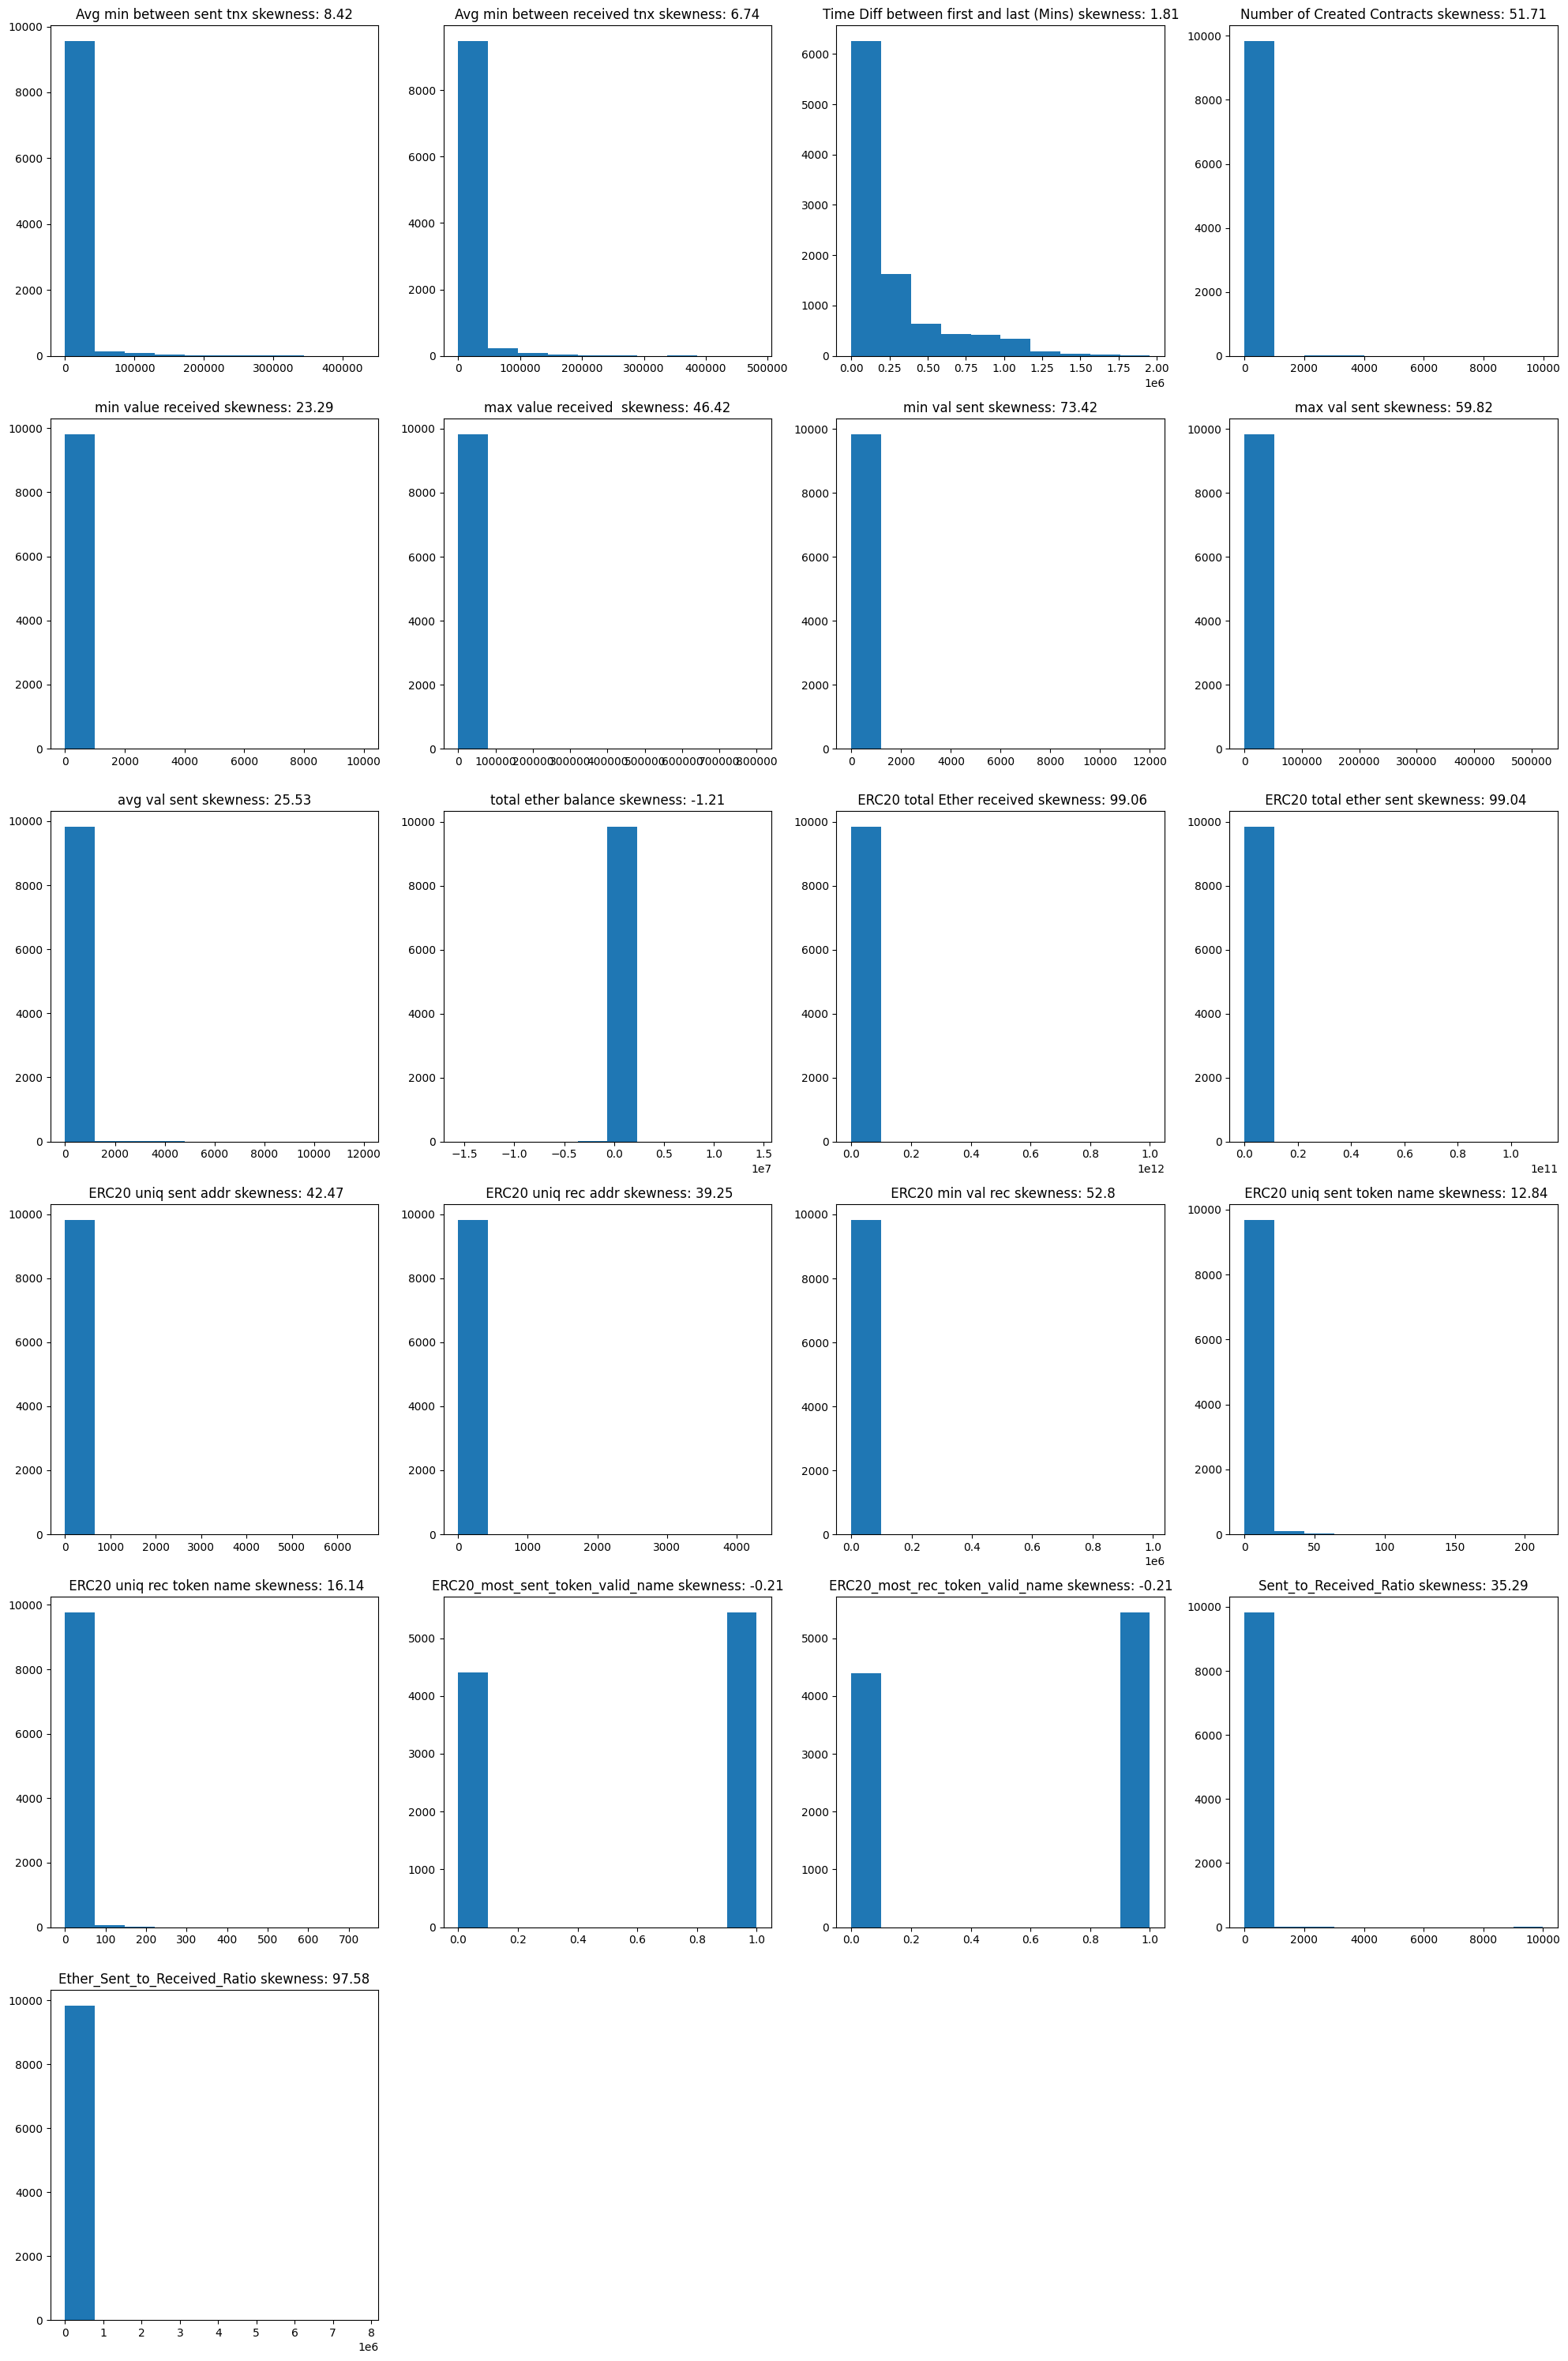

In [52]:
from scipy import stats
numeric_columns = dataset.dtypes[dataset.dtypes != 'object'].index
numeric_columns = list(numeric_columns)
numeric_columns.remove('Y')
# Determine the number of rows and columns for subplots
num_rows = (len(numeric_columns) + 3) // 4  # Adjust based on the desired layout
num_cols = 4  # You can change this based on your layout preference
# Creating box plots for each numeric column based on 'Response'
plt.figure(figsize=(20, 5*num_rows))
for idx, column in enumerate(numeric_columns, start=1):
    plt.subplot(num_rows, num_cols, idx)
    plt.hist(dataset[column])
    plt.title(column + " skewness: " +str(round(stats.skew(dataset[column]),2)))
plt.tight_layout()
plt.show()

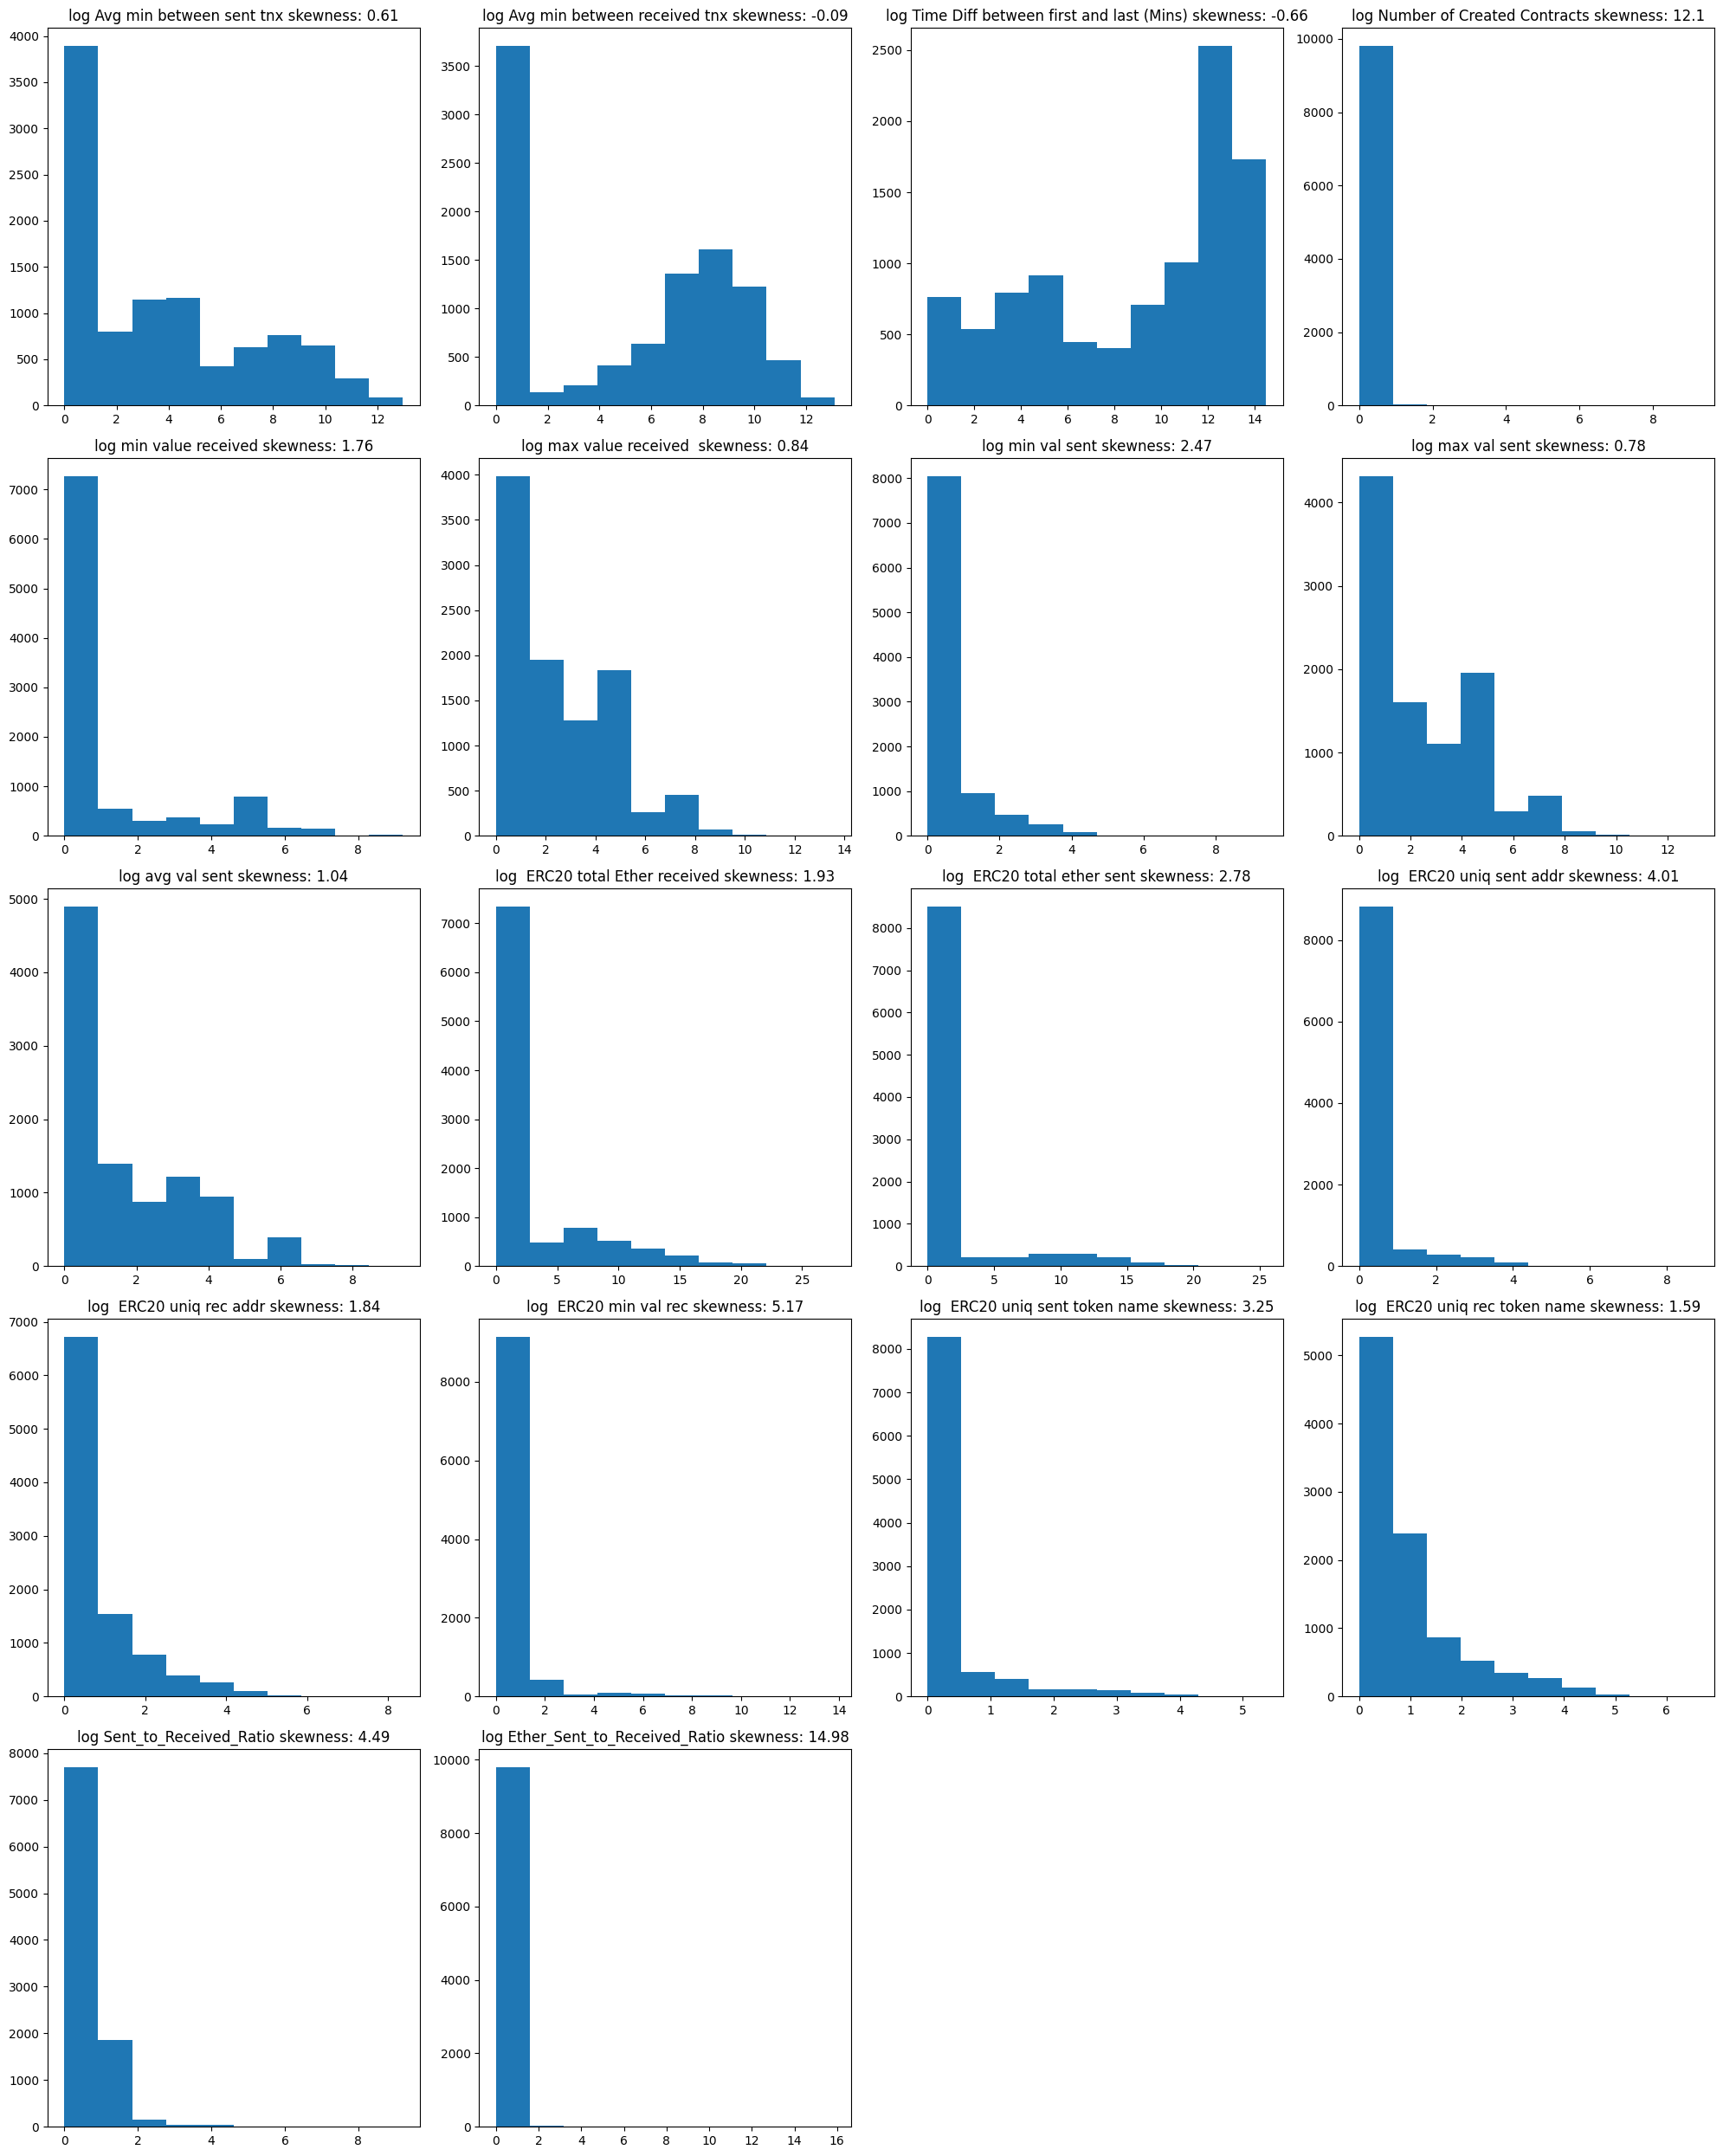

In [53]:
numeric_columns = dataset.dtypes[dataset.dtypes != 'object'].index
numeric_columns = list(numeric_columns)
numeric_columns.remove('Y')
numeric_columns.remove('ERC20_most_sent_token_valid_name')
numeric_columns.remove('ERC20_most_rec_token_valid_name')
#remove total ether balance because variable is already somewhat normal
numeric_columns.remove('total ether balance')
# Determine the number of rows and columns for subplots
num_rows = (len(numeric_columns) + 3) // 4  # Adjust based on the desired layout
num_cols = 4  # You can change this based on your layout preference
# Creating box plots for each numeric column based on 'Response'
plt.figure(figsize=(20, 5*num_rows))
for idx, column in enumerate(numeric_columns, start=1):
    plt.subplot(num_rows, num_cols, idx)
    log_transformed = np.log1p(dataset[column])
    plt.hist(log_transformed)
    plt.title("log " + column + " skewness: " +str(round(stats.skew(log_transformed),2)))
plt.tight_layout()
plt.show()

log transformation, splitting data, scaling, balancing

In [54]:
dataset_log = dataset.copy(deep = True)

In [55]:
numeric_columns

['Avg min between sent tnx',
 'Avg min between received tnx',
 'Time Diff between first and last (Mins)',
 'Number of Created Contracts',
 'min value received',
 'max value received ',
 'min val sent',
 'max val sent',
 'avg val sent',
 ' ERC20 total Ether received',
 ' ERC20 total ether sent',
 ' ERC20 uniq sent addr',
 ' ERC20 uniq rec addr',
 ' ERC20 min val rec',
 ' ERC20 uniq sent token name',
 ' ERC20 uniq rec token name',
 'Sent_to_Received_Ratio',
 'Ether_Sent_to_Received_Ratio']

In [56]:
for x in numeric_columns:
    dataset_log[x] = np.log1p(dataset_log[x])

In [57]:
dataset_log

,Y,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Number of Created Contracts,min value received,max value received,min val sent,max val sent,avg val sent,...,ERC20 total ether sent,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 min val rec,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20_most_sent_token_valid_name,ERC20_most_rec_token_valid_name,Sent_to_Received_Ratio,Ether_Sent_to_Received_Ratio
0,0,6.739644,6.998245,13.465650,0.000000,0.000000,3.846028,0.000000,3.472587,0.788767,...,17.387945,3.433987,4.007333,0.000000,3.688879,4.060443,1,1,2.208398,0.906690
1,0,9.450150,7.992755,14.012899,0.000000,0.000000,1.284613,0.000000,1.029619,0.032316,...,1.181975,0.693147,1.791759,0.000000,0.693147,2.079442,1,1,2.545531,0.693442
2,0,12.413881,7.797710,13.155276,0.000000,0.107166,0.772630,0.048790,1.512622,1.027584,...,0.000000,0.000000,2.079442,0.000000,0.000000,2.197225,1,1,0.182322,0.693086
3,0,9.232161,9.666884,12.893093,0.000000,0.000000,6.216606,0.000000,6.111467,4.262706,...,9.342529,1.098612,2.484907,0.000000,0.693147,2.484907,1,1,1.329136,1.083325
4,0,3.627270,9.278818,12.854414,0.693147,0.000000,2.624843,0.000000,2.302585,0.022434,...,11.724328,1.609438,3.178054,0.000000,1.945910,3.332205,1,1,5.441985,1.082732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,9.444313,6.449506,10.981038,0.000000,0.004074,2.564949,0.382170,2.580217,2.319085,...,0.000000,0.000000,1.098612,0.000000,0.000000,1.098612,1,1,0.268264,0.693034
9837,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.693147,2.665143,0.000000,0.693147,1,1,0.693147,0.693147
9838,1,7.824222,7.691789,12.474583,0.000000,0.001077,3.105035,0.003992,2.351375,0.653459,...,0.000000,0.000000,1.791759,0.000000,0.000000,1.791759,1,1,0.939280,0.772065
9839,1,0.000000,0.000000,0.000000,0.000000,0.405465,0.405465,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0.000000,0.000000


In [58]:
from sklearn.model_selection import train_test_split
y = dataset_log.Y
X = dataset_log.drop('Y', axis = 1)

In [59]:
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10
# taken form :https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state = 42, stratify = y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio),random_state = 1,stratify = y_test)


In [60]:
#check rows
print("training set shape: ", X_train.shape)
print("validation set shape: ", X_val.shape)
print("testing set shape: ", X_test.shape)

training set shape:  (6888, 21)
validation set shape:  (1968, 21)
testing set shape:  (985, 21)


In [61]:
from sklearn.preprocessing import StandardScaler
# append total ether balance back after log trf step
numeric_columns.append('total ether balance')
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_val[numeric_columns] = scaler.transform(X_val[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

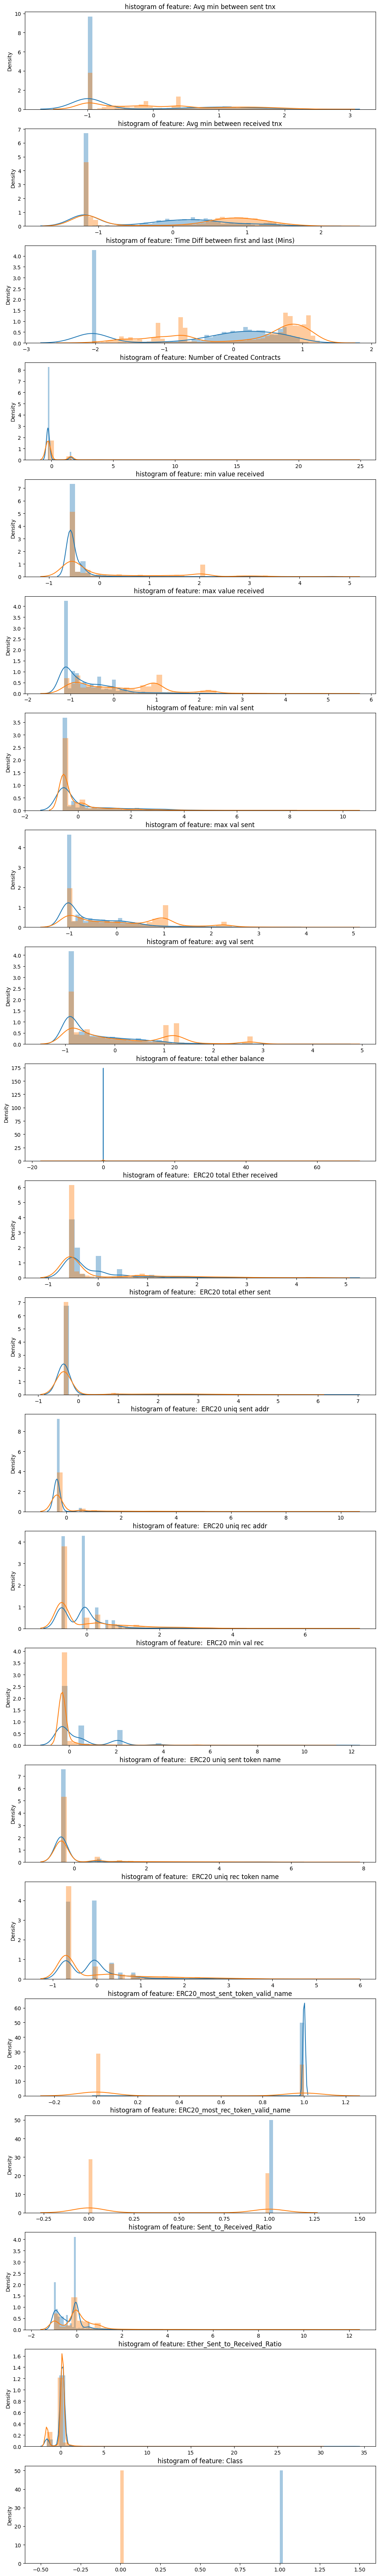

In [62]:
import matplotlib.gridspec as gridspec
training = X_train.copy(deep = True)
training['Class'] = y_train
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(training.columns):
    ax = plt.subplot(gs[i])
    sns.distplot(training[cn][training.Class == 1], bins=50)
    sns.distplot(training[cn][training.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

## 7. Balancing the data

In [63]:
X_train.isnull().sum()

Avg min between sent tnx                   0
Avg min between received tnx               0
Time Diff between first and last (Mins)    0
Number of Created Contracts                0
min value received                         0
max value received                         0
min val sent                               0
max val sent                               0
avg val sent                               0
total ether balance                        0
 ERC20 total Ether received                0
 ERC20 total ether sent                    0
 ERC20 uniq sent addr                      0
 ERC20 uniq rec addr                       0
 ERC20 min val rec                         0
 ERC20 uniq sent token name                0
 ERC20 uniq rec token name                 0
ERC20_most_sent_token_valid_name           0
ERC20_most_rec_token_valid_name            0
Sent_to_Received_Ratio                     0
Ether_Sent_to_Received_Ratio               0
dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
print("rows of fraud transaction in training set:" , y_train_res[y_train_res == 1].shape)
print("rows of non-fraud transaction in training set:" , y_train_res[y_train_res == 0].shape)

rows of fraud transaction in training set: (5363,)
rows of non-fraud transaction in training set: (5363,)


Information gain

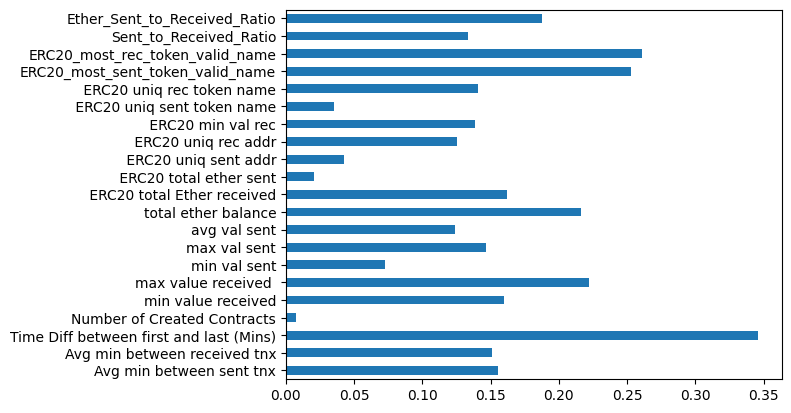

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train_res, y_train_res, random_state = 42)
feat_importances = pd.Series(importances,X_train_res.columns[0:len(X_train_res.columns)] )
feat_importances.plot(kind = "barh")
plt.show()

Plots to find any potential pattern

Relative Plot of Selected Features: A Data Subset


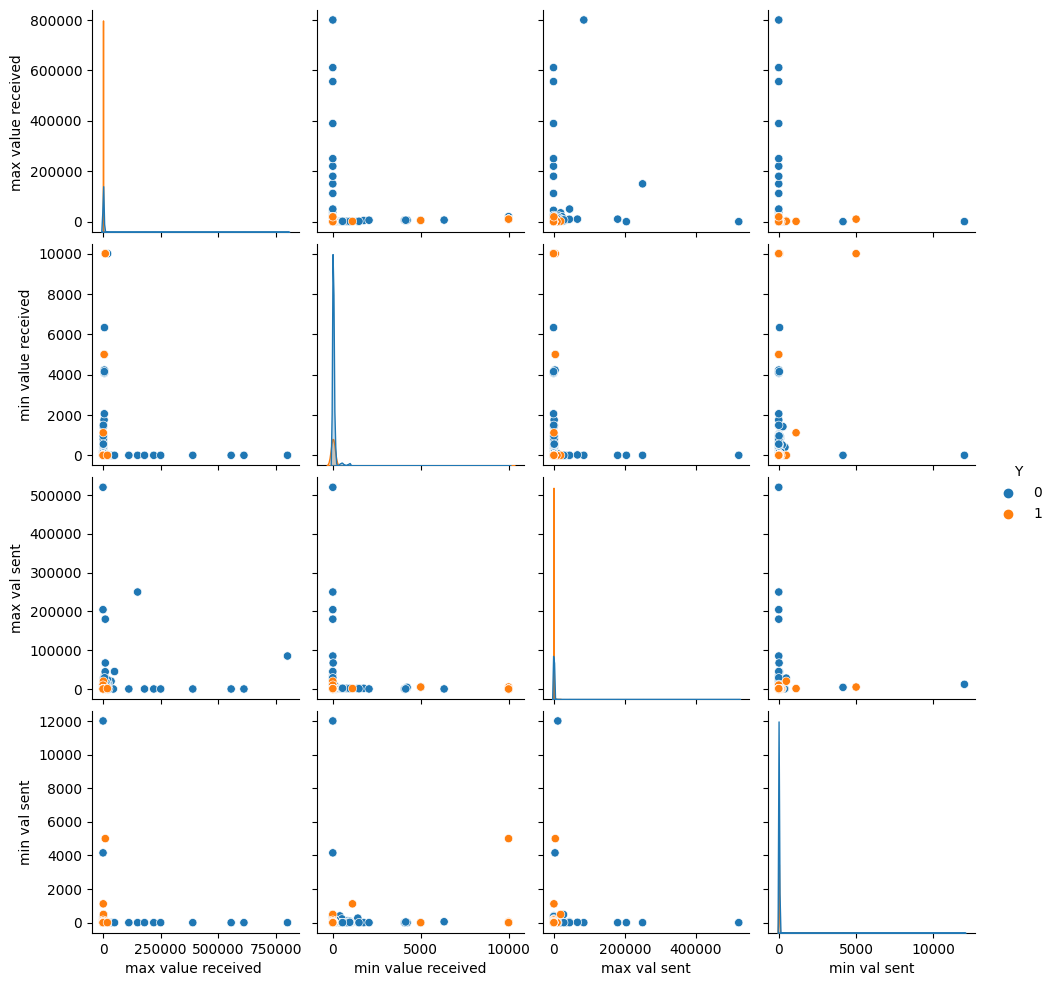

In [ ]:
features_to_plot = ["max value received ", "min value received", "Y", "max val sent", "min val sent"]

# Print a title for the plot.
print("Relative Plot of Selected Features: A Data Subset")

# Create a pair plot.
sns.pairplot(dataset[features_to_plot], hue="Y")

# Display the plot.
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.model_selection import cross_val_score, GridSearchCV
svc = SVC(random_state=42)
svc.fit(X_train,y_train)
# we use k-fold cross validation to calculate within the training set
# print("*** Using a k-fold cross validation for calculating train set accuracy ****")
# accuracies = cross_val_score(svc,X_train,y_train,cv=5)
# print("Train Score:", np.mean(accuracies))
# y_test_pred = svc.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print("Test Score:", test_accuracy)

# we can also just simply train it, and check with the values
svc = SVC(random_state=42)
svc.fit(X_train,y_train)
y_train_pred = svc.predict(X_val)
training_accuracy = accuracy_score(y_val, y_train_pred)
f1_training_accuracy = f1_score(y_val, y_train_pred)
print("*** Using conventional validation set for calculating train set accuracy ****")

print("Accuracy Train Score:", training_accuracy)
print("F1 Train Score:", f1_training_accuracy)
print("Precision Train Score:", precision_score(y_val, y_train_pred))
print("Recall Train Score:", recall_score(y_val, y_train_pred))
y_test_pred = svc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
f1_test_accuracy = f1_score(y_test, y_test_pred)

print("*** Using conventional validation set for calculating test set accuracy ****")


print("Accuracy Test Score:", test_accuracy)
print("F1 Test Score:", f1_test_accuracy)
print("Precision Test Score:", precision_score(y_test, y_test_pred))
print("Recall Test Score:", recall_score(y_test, y_test_pred))

*** Using conventional validation set for calculating train set accuracy ****
Accuracy Train Score: 0.967479674796748
F1 Train Score: 0.9245283018867926
Precision Train Score: 0.9514563106796117
Recall Train Score: 0.8990825688073395
*** Using conventional validation set for calculating test set accuracy ****
Accuracy Test Score: 0.9644670050761421
F1 Test Score: 0.91725768321513
Precision Test Score: 0.9463414634146341
Recall Test Score: 0.8899082568807339


For hyperparameter tuning, there are a few things we can change:
1. Kernel: different kernel functions are used to map the input data into higher-dimensional space, so we can obtain a non-linear seperation. I.e. Polynomial, RBF and sigmoid.
https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/
2. C (i.e. regularization parameter): C parameter controls trade-off between maximizing the margin and minimizing classification error. A smaller C value makes the margin wider, but allows more training points to be classified. vice versa
3. Gamma Parameter (Kernel coefficient): For non-linear kernels, gamma parameter shapes the shape of the decision boundary - smaller values of gmma lead to a more flexible decision boundary, and vice versa.
4. Degree parameter: set for degree of polynomial when kernel used is polynomial. Set the degree of the polynomial used to find the hyperplane to split the data


In [ ]:
# grid = {
#     'C':[0.01,0.1,1,10],
#     'kernel' : ["linear","poly","rbf","sigmoid"],
#     'degree' : [1,2,3,4,5,6,7],
#     'gamma' : [0.01,1]
# }

# svc = SVC(random_state=42)

# svm_cv = GridSearchCV(svc, grid, cv=5)
# svm_cv.fit(X_train,y_train)

# print("Best Parameters:",svm_cv.best_params_)

# let's not run this because it takes really long but the results are

Best Parameters: {'C': 0.01, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}


In [ ]:
# use the best parameters and compare performance
svc = SVC(random_state=42, C=0.01, degree=3, gamma=1, kernel='poly')
svc.fit(X_train,y_train)
y_train_pred = svc.predict(X_val)
training_accuracy = accuracy_score(y_val, y_train_pred)
print("*** Using conventional validation set for calculating train set accuracy ****")

print("Train Score:", training_accuracy)
f1_training_accuracy = f1_score(y_val, y_train_pred)
print("F1 Train Score:", f1_training_accuracy)
print("Precision Train Score:", precision_score(y_val, y_train_pred))
print("Recall Train Score:", recall_score(y_val, y_train_pred))
y_test_pred = svc.predict(X_test)
print("*** Using conventional validation set for calculating test set accuracy ****")

test_accuracy = accuracy_score(y_test, y_test_pred)
f1_test_accuracy = f1_score(y_test, y_test_pred)
print("Test Score:", test_accuracy)
print("F1 Test Score:", f1_test_accuracy)
print("Precision Test Score:", precision_score(y_test, y_test_pred))
print("Recall Test Score:", recall_score(y_test, y_test_pred))

*** Using conventional validation set for calculating train set accuracy ****
Train Score: 0.9705284552845529
F1 Train Score: 0.9336384439359269
Precision Train Score: 0.9315068493150684
Recall Train Score: 0.9357798165137615
*** Using conventional validation set for calculating test set accuracy ****
Test Score: 0.966497461928934
F1 Test Score: 0.9241379310344828
Precision Test Score: 0.9262672811059908
Recall Test Score: 0.9220183486238532


<Figure size 1600x800 with 0 Axes>

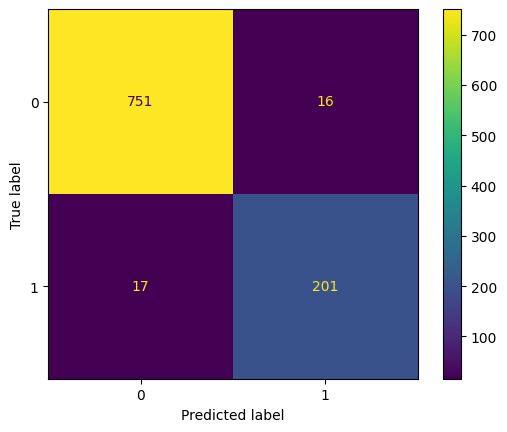

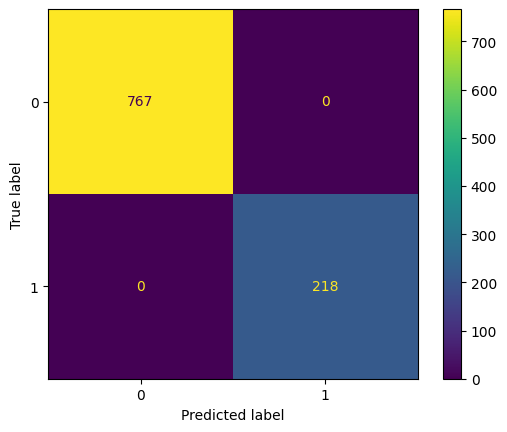

In [ ]:
labels = [0, 1]
svm_cm = confusion_matrix(y_test, y_test_pred, labels = labels)
actual_cm = confusion_matrix(y_test, y_test, labels = labels)

fig = plt.figure(figsize=(16,8))

plt1 = ConfusionMatrixDisplay(confusion_matrix = svm_cm, display_labels =labels)
plt1.plot()

plt2 = ConfusionMatrixDisplay(confusion_matrix= actual_cm, display_labels=labels)
plt2.plot()

# CNN

In [ ]:
# !pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy


In [ ]:
n_inputs = X_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
oversample_model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=300, epochs=20, shuffle=True, verbose=2)




Epoch 1/20
23/23 - 1s - loss: 0.6233 - accuracy: 0.6738 - val_loss: 0.4527 - val_accuracy: 0.8389 - 1s/epoch - 50ms/step
Epoch 2/20
23/23 - 0s - loss: 0.4133 - accuracy: 0.8396 - val_loss: 0.3640 - val_accuracy: 0.8521 - 89ms/epoch - 4ms/step
Epoch 3/20
23/23 - 0s - loss: 0.3371 - accuracy: 0.8746 - val_loss: 0.2980 - val_accuracy: 0.8968 - 85ms/epoch - 4ms/step
Epoch 4/20
23/23 - 0s - loss: 0.2746 - accuracy: 0.9199 - val_loss: 0.2468 - val_accuracy: 0.9233 - 93ms/epoch - 4ms/step
Epoch 5/20
23/23 - 0s - loss: 0.2281 - accuracy: 0.9338 - val_loss: 0.2090 - val_accuracy: 0.9289 - 84ms/epoch - 4ms/step
Epoch 6/20
23/23 - 0s - loss: 0.1930 - accuracy: 0.9371 - val_loss: 0.1812 - val_accuracy: 0.9329 - 89ms/epoch - 4ms/step
Epoch 7/20
23/23 - 0s - loss: 0.1686 - accuracy: 0.9412 - val_loss: 0.1640 - val_accuracy: 0.9375 - 73ms/epoch - 3ms/step
Epoch 8/20
23/23 - 0s - loss: 0.1520 - accuracy: 0.9476 - val_loss: 0.1524 - val_accuracy: 0.9497 - 81ms/epoch - 4ms/step
Epoch 9/20
23/23 - 0s - l

In [ ]:
oversample_predictions = oversample_model.predict(X_test, batch_size=200, verbose=0)


oversample_fraud_predictions = np.argmax(oversample_predictions,axis=1)

test_accuracy = accuracy_score(y_test, oversample_fraud_predictions)
f1_test_accuracy = f1_score(y_test, oversample_fraud_predictions)
print("Test Score:", test_accuracy)
print("F1 Test Score:", f1_test_accuracy)
print("Precision:", precision_score(y_test, oversample_fraud_predictions))
print("Recall:", recall_score(y_test, oversample_fraud_predictions))

Test Score: 0.9543147208121827
F1 Test Score: 0.8936170212765958
Precision: 0.9219512195121952
Recall: 0.8669724770642202


<Figure size 1600x800 with 0 Axes>

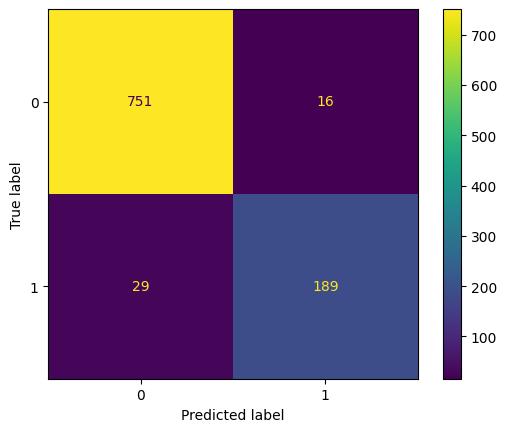

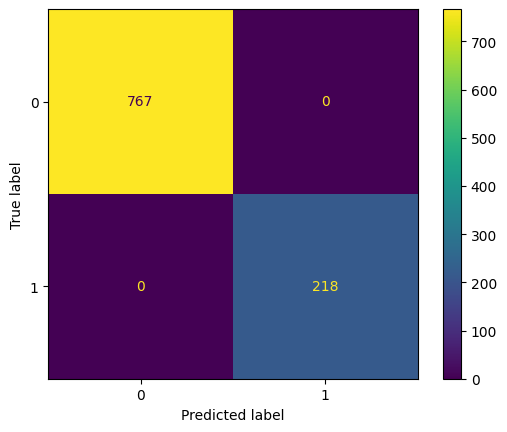

In [ ]:
labels = [0, 1]
oversample_smote = confusion_matrix(y_test, oversample_fraud_predictions, labels = labels)
actual_cm = confusion_matrix(y_test, y_test, labels = labels)

fig = plt.figure(figsize=(16,8))

plt1 = ConfusionMatrixDisplay(confusion_matrix = oversample_smote, display_labels =labels)
plt1.plot()

plt2 = ConfusionMatrixDisplay(confusion_matrix= actual_cm, display_labels=labels)
plt2.plot()

# Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state=42)
model = decisionTree.fit(X_train_res, y_train_res)

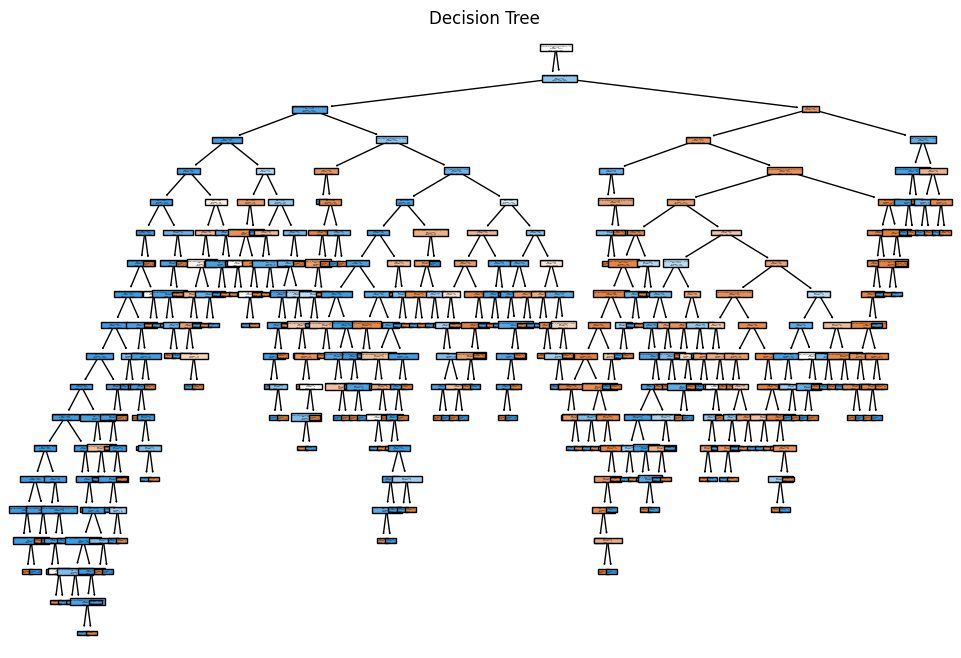

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plot_tree(model, filled=True, feature_names=X_train_res.columns)
plt.title("Decision Tree")
plt.show()


In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


# Using the model to make predictions for the test data set
y_pred = model.predict(X_val)

# Computing accuracy, recall, precision, and f1 score

accuracy_before = accuracy_score(y_val, y_pred)
recall_before = recall_score(y_val, y_pred)
precision_before = precision_score(y_val, y_pred)
f1_before = f1_score(y_val, y_pred)

print("Accuracy before tuning: ", accuracy_before)
print("Recall before tuning: ", recall_before)
print("Precision before tuning: ", precision_before)
print("F1 score before tuning: ", f1_before)

Accuracy before tuning:  0.961890243902439
Recall before tuning:  0.926605504587156
Precision before tuning:  0.9038031319910514
F1 score before tuning:  0.9150622876557192


In [117]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth':range(1, 25),
    'min_samples_split': range(1, 5),
    'min_samples_leaf': range(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],  # Categorical options
    'criterion' :['gini', 'entropy', 'log_loss'],
    # 'splitter': ['best', 'random']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 25),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5)},
             scoring='accuracy')

In [118]:
# best params out of all the combi that maximises accuracy
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 18,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3}

Best params:
{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4}

 {'criterion': 'entropy',
 'max_depth': 18,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

 'criterion': 'gini',
    'max_depth': 19,
    'min_samples_split': 2,
    'min_samples_leaf': 1, -> parms thast gave the same results

In [119]:
# Best-tuned hyperparameters
best_params = {
    'criterion': 'entropy',
    'max_depth': 18,
    'min_samples_split': 3,
    'min_samples_leaf': 1,
    'max_features': 'auto',

}

# Create a Decision Tree classifier with the best-tuned parameters
best_decision_tree = DecisionTreeClassifier(**best_params, random_state=42)

# Fit the model to your training data
best_decision_tree.fit(X_train_res, y_train_res)

# Use the model to make predictions on the validation set
y_val_pred = best_decision_tree.predict(X_val)

accuracy_after = accuracy_score(y_val, y_val_pred)
f1_after = f1_score(y_val, y_val_pred)
precision_after = precision_score(y_val, y_val_pred)
recall_after = recall_score(y_val, y_val_pred)

print("Accuracy after tuning: ", accuracy_after)
print("Recall after tuning: ", recall_after)
print("Precision after tuning: ", precision_after)
print("F1 score after tuning: ", f1_after)

Accuracy after tuning:  0.959349593495935
Recall after tuning:  0.926605504587156
Precision after tuning:  0.8938053097345132
F1 score after tuning:  0.9099099099099099


In [116]:
metrics_dict = {
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall'],
    'Before Tuning': [accuracy_before, f1_before, precision_before, recall_before],
    'After Tuning': [accuracy_after, f1_after, precision_after, recall_after]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Set 'Metric' as the index
metrics_df.set_index('Metric', inplace=True)

# Display the DataFrame
print(metrics_df)

           Before Tuning  After Tuning
Metric                                
Accuracy        0.961890      0.961890
F1 Score        0.915062      0.915062
Precision       0.903803      0.903803
Recall          0.926606      0.926606


Results became worse after tuning. Hence, I used the original model to fit the test set instead


In [71]:
# Use the model to make predictions on the test set
y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

print("Accuracy on test set: ", test_accuracy)
print("Recall on test set: ", test_recall)
print("Precision on test set: ", test_precision)
print("F1 score on test set: ", test_f1)

Accuracy on test set:  0.965482233502538
Recall on test set:  0.9174311926605505
Precision on test set:  0.9259259259259259
F1 score on test set:  0.9216589861751153


In [72]:
final_performance_dict = {
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall'],
    'Before Tuning': [accuracy_before, f1_before, precision_before, recall_before],
    'After Tuning': [accuracy_after, f1_after, precision_after, recall_after],
    'Test': [test_accuracy, test_f1, test_precision, test_recall]
}

# Create a DataFrame from the dictionary
final_performance_df = pd.DataFrame(final_performance_dict)

# Set 'Metric' as the index
final_performance_df.set_index('Metric', inplace=True)

# Display the DataFrame
print(final_performance_df)

           Before Tuning  After Tuning      Test
Metric                                          
Accuracy        0.961890      0.951220  0.965482
F1 Score        0.915062      0.893333  0.921659
Precision       0.903803      0.866379  0.925926
Recall          0.926606      0.922018  0.917431


# Random Forest
Karen's version

In [ ]:
X_train_combined = X_train.append(X_val, ignore_index=True)
y_train_combined = y_train.append(y_val , ignore_index=True)

## Primary Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
model = RandomForestClassifier(random_state = 42)
print('Parameters currently in use:\n')
print(model.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
model.fit(X_train_combined, y_train_combined)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9746192893401016
Precision: 0.9753694581280788
Recall: 0.908256880733945
F1 Score: 0.9406175771971497
ROC AUC Score: 0.9508689879549778
Confusion Matrix:
[[762   5]
 [ 20 198]]


## Random Search Cross Validation in Scikit-Learn

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

model = RandomForestClassifier(random_state = 42)
model_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1, random_state = 42)
model_random.fit(X_train_combined, y_train_combined)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
model_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [ ]:
def evaluate(model, model_name, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = accuracy_score(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred)
    recall = recall_score(test_labels, y_pred)
    f1 = f1_score(test_labels, y_pred)
    roc_auc = roc_auc_score(test_labels, y_pred)
    conf_matrix = confusion_matrix(test_labels, y_pred)

    print("Model evaluation for: " + model_name)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print(f"Confusion Matrix:\n{conf_matrix}")

    return accuracy
base_model = RandomForestClassifier(random_state = 42)
base_model.fit(X_train_combined, y_train_combined)
base_accuracy = evaluate(base_model, "Base Model", X_test, y_test)

best_random = model_random.best_estimator_
random_accuracy = evaluate(best_random, "Best Random Model", X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model evaluation for: Base Model
Accuracy: 0.9746192893401016
Precision: 0.9753694581280788
Recall: 0.908256880733945
F1 Score: 0.9406175771971497
ROC AUC Score: 0.9508689879549778
Confusion Matrix:
[[762   5]
 [ 20 198]]
Model evaluation for: Best Random Model
Accuracy: 0.9766497461928934
Precision: 0.9802955665024631
Recall: 0.9128440366972477
F1 Score: 0.9453681710213777
ROC AUC Score: 0.9538144564190281
Confusion Matrix:
[[763   4]
 [ 19 199]]
Improvement of 0.21%.


## Grid Search with Cross Validation

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [40,50,60,70],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True],
}

model_grid = RandomForestClassifier(random_state = 42)
grid_search = GridSearchCV(estimator = model_grid, param_grid = param_grid,
                          cv = 3, verbose = 2, n_jobs = -1)

grid_search.fit(X_train_combined, y_train_combined)

grid_search.best_params_


Fitting 3 folds for each of 72 candidates, totalling 216 fits


{'bootstrap': True,
 'max_depth': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, "Best Grid Model", X_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Model evaluation for: Best Grid Model
Accuracy: 0.9746192893401016
Precision: 0.9753694581280788
Recall: 0.908256880733945
F1 Score: 0.9406175771971497
ROC AUC Score: 0.9508689879549778
Confusion Matrix:
[[762   5]
 [ 20 198]]
Improvement of 0.00%.


# Neural Network MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_res,y_train_res)
y_pred_train = mlp.predict(X_train_res)
new_y_pred = mlp.predict(X_val)
print("F1 OF THE MODEL ON VALIDATION: ", metrics.f1_score(y_val, new_y_pred))
print("Recall OF THE MODEL ON VALIDATION", metrics.recall_score(y_val, new_y_pred))

F1 OF THE MODEL ON VALIDATION:  0.9298642533936651
Recall OF THE MODEL ON VALIDATION 0.9426605504587156


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'hidden_layer_sizes' : list(range(52,92)),
    'activation' : ['logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
}

CV = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid, random_state = 42)
CV.fit(X_train_res, y_train_res)
new_y_pred = CV.predict(X_val)
print("F1 OF THE MODEL ON VALIDATION: ", metrics.f1_score(y_val, new_y_pred))
print("Recall OF THE MODEL ON VALIDATION", metrics.recall_score(y_val, new_y_pred))

F1 OF THE MODEL ON VALIDATION:  0.9375709421112374
Recall OF THE MODEL ON VALIDATION 0.9472477064220184
